<a href="https://colab.research.google.com/github/ednei-code/An-lise-de-Dados-dos-Impactos-Lunares-/blob/main/Lunar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Projeto de Análise de Dados — NELIOTA (Flashes de Impactos Lunares)
# Autor: *Ednei Vicente - Cientista de Dados*
### Data: *2025*


O NELIOTA (NEO Lunar Impacts and Optical Transients) é um programa da ESA que monitora a Lua em busca de micrometeoroides que produzem flashes ópticos de milissegundos ao atingirem a superfície lunar.
Os dados utilizados neste projeto incluem registros validados de eventos captados por câmeras de alta velocidade em dois filtros (R e I).

Neste notebook, realizamos uma análise exploratória e estatística dos flashes registrados, investigando padrões, distribuições, relações entre variáveis e possíveis tendências relacionadas aos impactos lunares.

Créditos e Responsáveis pelo NELIOTA

Os dados utilizados neste projeto são provenientes do programa NELIOTA, desenvolvido por:

ESA – Agência Espacial Europeia

NOA – Observatório Nacional Helênico

IAASARS – Instituto de Astronomia, Astrofísica, Espaço e Tecnologia

Equipe científica NELIOTA, responsável pela detecção, validação e divulgação dos eventos observados.
🔗 **Fonte oficial dos dados:**  
https://neliota.astro.noa.gr/


 Objetivo do Projeto

O objetivo deste notebook é analisar os eventos registrados pelo programa NELIOTA e investigar padrões temporais, físicos e experimentais dos impactos lunares, além de avaliar a distribuição das classificações fornecidas pelos especialistas.

Perguntas que este projeto irá responder

🔵 Perguntas temporais

Em quais anos ocorreram mais impactos?

Existe algum padrão sazonal (mensal)?

Há relação entre a duração do flash e a data do evento?

🔴 Perguntas físicas

Onde se concentram os impactos mais brilhantes?

A latitude/longitude lunar influencia o brilho detectado?

Qual é a relação entre duração do evento e magnitude (proxy de energia)?

🟣 Perguntas experimentais

O valor de airmass influencia a detecção?

O número de frames capturados afeta a confiabilidade do evento?

🟢 Classificação dos especialistas

Quantos eventos são classificados como NEO?

Quantos eventos são considerados ruído ou suspeitos?

Como podemos padronizar esses rótulos para análise e modelagem?

### **Importação das bibliotecas usadas nesse projeto**

In [ ]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Datas
from datetime import datetime

# Machine Learning (caso avance para classificação)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Ignorar warnings desnecessários
import warnings
warnings.filterwarnings('ignore')

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# **Importação dos Dados**

In [ ]:
# Caminho para o arquivo dentro da pasta sample_data
caminho = "/content/sample_data/impacto_lunar.csv"

# Carregando o dataset
df = pd.read_csv(caminho)

# Exibindo as primeiras linhas
df.head()


,UT Date,UT Time,R Magnitude,R Magnitude error,I Magnitude,I Magnitude error,Lunar Latitude (degrees),Lunar Latitude error (degrees),Lunar Longitude (degrees),Lunar Longitude error (degrees),Frames in R,Frames in I,Max Duration (sec),Airmass,Expert Classification
0,2017-02-01,17:13:57.863,10.15,0.12,9.05,0.05,-1.5,0.5,-29.2,0.5,1,1,0.033,1.66,NEO
1,2017-03-01,17:08:46.573,6.67,0.07,6.07,0.06,-10.3,0.5,-9.7,0.5,2,4,0.132,2.18,NEO
2,2017-03-01,17:13:17.36,9.15,0.11,8.23,0.07,4.5,0.5,29.9,0.5,1,1,0.033,2.18,NEO
3,2017-03-04,20:51:31.853,9.50,0.14,8.79,0.06,-12.7,0.5,-58.9,0.5,1,1,0.033,2.55,NEO
4,2017-04-01,19:45:51.65,10.18,0.13,8.61,0.03,11.6,0.5,-58.8,0.5,1,1,0.033,2.44,NEO


# **Renomeando as colunas para melhor visualização**

In [ ]:
df = df.rename(columns={
    "UT Date": "ut_date",
    "UT Time": "ut_time",
    "R Magnitude": "r_mag",
    "R Magnitude error": "r_mag_error",
    "I Magnitude": "i_mag",
    "I Magnitude error": "i_mag_error",
    "Lunar Latitude (degrees)": "lunar_lat",
    "Lunar Latitude error (degrees)": "lunar_lat_error",
    "Lunar Longitude (degrees)": "lunar_lon",
    "Lunar Longitude error (degrees)": "lunar_lon_error",
    "Frames in R": "frames_r",
    "Frames in I": "frames_i",
    "Max Duration (sec)": "duration_sec",
    "Airmass": "airmass",
    "Expert Classification": "expert_class"
})
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ut_date          313 non-null    object 
 1   ut_time          313 non-null    object 
 2   r_mag            313 non-null    float64
 3   r_mag_error      313 non-null    float64
 4   i_mag            313 non-null    float64
 5   i_mag_error      313 non-null    float64
 6   lunar_lat        313 non-null    float64
 7   lunar_lat_error  313 non-null    float64
 8   lunar_lon        313 non-null    float64
 9   lunar_lon_error  313 non-null    float64
 10  frames_r         313 non-null    int64  
 11  frames_i         313 non-null    int64  
 12  duration_sec     313 non-null    float64
 13  airmass          313 non-null    float64
 14  expert_class     313 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 36.8+ KB


Descrição das Variáveis do Dataset

O conjunto de dados fornecido pelo programa NELIOTA contém as seguintes variáveis:

UT Date – Data do evento em tempo universal (UTC).

UT Time – Horário exato do impacto, permitindo análise temporal precisa.

R Magnitude – Magnitude do flash no filtro R (vermelho), usada como indicador de intensidade luminosa.

R Magnitude error – Incerteza na medição da magnitude R.

I Magnitude – Magnitude no filtro I (infravermelho próximo), complementando a análise energética.

I Magnitude error – Incerteza associada à magnitude I.

Lunar Latitude (degrees) – Latitude selenográfica do ponto de impacto.

Lunar Latitude error (degrees) – Margem de erro da latitude.

Lunar Longitude (degrees) – Longitude selenográfica do evento.

Lunar Longitude error (degrees) – Incerteza da longitude.

Frames in R – Número de frames detectados no filtro R.

Frames in I – Número de frames detectados no filtro I.

Max Duration (sec) – Duração máxima estimada do flash.

Airmass – Massa de ar atravessada pela luz antes de chegar ao telescópio, influenciando a observação.

Expert Classification – Rótulo fornecido pelos especialistas, indicando se o evento é real, ruído ou suspeito.

In [ ]:
df.head()

,ut_date,ut_time,r_mag,r_mag_error,i_mag,i_mag_error,lunar_lat,lunar_lat_error,lunar_lon,lunar_lon_error,frames_r,frames_i,duration_sec,airmass,expert_class
0,2017-02-01,17:13:57.863,10.15,0.12,9.05,0.05,-1.5,0.5,-29.2,0.5,1,1,0.033,1.66,NEO
1,2017-03-01,17:08:46.573,6.67,0.07,6.07,0.06,-10.3,0.5,-9.7,0.5,2,4,0.132,2.18,NEO
2,2017-03-01,17:13:17.36,9.15,0.11,8.23,0.07,4.5,0.5,29.9,0.5,1,1,0.033,2.18,NEO
3,2017-03-04,20:51:31.853,9.50,0.14,8.79,0.06,-12.7,0.5,-58.9,0.5,1,1,0.033,2.55,NEO
4,2017-04-01,19:45:51.65,10.18,0.13,8.61,0.03,11.6,0.5,-58.8,0.5,1,1,0.033,2.44,NEO


Preparação e Limpeza dos Dados

Antes de iniciar a Análise Exploratória (EDA), foi realizada uma etapa completa de verificação da integridade e consistência do dataset NELIOTA. O objetivo foi garantir que todas as variáveis estivessem adequadamente formatadas e prontas para análise.

1. Verificação de valores ausentes

Nenhuma coluna apresentou valores nulos (NaN).
Isso indica que o dataset está completo e não requer imputação.

2. Detecção de linhas duplicadas

Nenhuma linha duplicada foi identificada.
O dataset possui 313 registros únicos, representando 313 eventos lunares independentes.

3. Limpeza da coluna de magnitude R (r_mag)

A inspeção inicial revelou que o valor -99.99 aparecia em 100 registros.
Esse valor não é físico e é utilizado pelo pipeline do NELIOTA como placeholder de ausência de detecção no filtro R.

Para evitar distorções estatísticas, esses valores foram convertidos para NaN, de forma que apenas magnitudes válidas fossem utilizadas nas análises.

4. Verificação física das variáveis

As variáveis relacionadas a duração do flash, número de frames e airmass apresentaram valores coerentes com os limites esperados em observações astronômicas:

duration_sec entre 0.033 s e 0.429 s

frames_r entre 0 e 6

frames_i entre 1 e 13

airmass entre 1.08 e 3.82

Nenhum valor negativo ou fisicamente impossível foi identificado.

5. Consistência das coordenadas lunares

As colunas lunar_lat e lunar_lon apresentam valores dentro dos intervalos selenográficos válidos:

Latitude: -90° a +90°

Longitude: -180° a +180°

Não houve necessidade de correção.

6. Padronização da coluna-alvo (expert_class)

A coluna de classificação fornecida pelos especialistas apresentava grande variação de rótulos (mais de 30 versões diferentes), incluindo diferenças de capitalização, variações semânticas e erros de grafia.

Para organizar adequadamente as categorias, foi criada a coluna expert_class_clean, agrupando os eventos em três classes finais:

real – impacto lunar confirmado

neo – evento associado a meteoroides próximos da Terra (Near-Earth Objects)

suspected – evento suspeito, com baixa confiabilidade

(eventos residuais foram classificados como other)

A contagem resultante foi:

real: 219

neo: 76

suspected: 16

other: 2

Essa padronização é essencial para análises comparativas e modelos futuros.

In [ ]:
# =====================================================
# 🔍 1. Verificar valores ausentes (NaN)
# =====================================================
print("Valores ausentes por coluna:")
print(df.isna().sum())

# Visualização mais clara em porcentagem
(df.isna().mean() * 100).round(2)


Valores ausentes por coluna:
ut_date            0
ut_time            0
r_mag              0
r_mag_error        0
i_mag              0
i_mag_error        0
lunar_lat          0
lunar_lat_error    0
lunar_lon          0
lunar_lon_error    0
frames_r           0
frames_i           0
duration_sec       0
airmass            0
expert_class       0
dtype: int64


,0
ut_date,0.0
ut_time,0.0
r_mag,0.0
r_mag_error,0.0
i_mag,0.0
i_mag_error,0.0
lunar_lat,0.0
lunar_lat_error,0.0
lunar_lon,0.0
lunar_lon_error,0.0


In [ ]:
# =====================================================
# 🔍 2. Verificar duplicatas
# =====================================================
print("Número de linhas duplicadas:", df.duplicated().sum())


Número de linhas duplicadas: 0


In [ ]:
# =====================================================
# 🔍 4. Procurar valores negativos onde não deveriam existir
#     (duração, frames e airmass nunca podem ser negativos)
# =====================================================
df[["duration_sec", "frames_r", "frames_i", "airmass"]].describe()


,duration_sec,frames_r,frames_i,airmass
count,313.000000,313.000000,313.000000,313.000000
mean,0.061514,0.827476,1.888179,2.251275
std,0.048265,0.805995,1.470965,0.652121
min,0.033000,0.000000,1.000000,1.081000
25%,0.033000,0.000000,1.000000,1.725000
50%,0.066000,1.000000,2.000000,2.240000
75%,0.066000,1.000000,2.000000,2.676000
max,0.429000,6.000000,13.000000,3.823000


In [ ]:
# Procurar negativos explicitamente
negativos = df[(df["duration_sec"] < 0) |
               (df["frames_r"] < 0) |
               (df["frames_i"] < 0) |
               (df["airmass"] < 0)]

print("Valores negativos encontrados:")
negativos


Valores negativos encontrados:


,ut_date,ut_time,r_mag,r_mag_error,i_mag,i_mag_error,lunar_lat,lunar_lat_error,lunar_lon,lunar_lon_error,frames_r,frames_i,duration_sec,airmass,expert_class


In [ ]:
# =====================================================
# 🔍 5. Verificar rótulos da classificação (consistência)
# =====================================================
df["expert_class"].value_counts()


,count
expert_class,
Real impact flash,103
Suspected impact flash,51
NEO flash,24
Suspected NEO flash,18
suspected impact flash,17
NEO Flash,14
real impact flash,13
Suspected flash,9
Validated impact flash,9


In [ ]:
# =====================================================
# 🔍 6. Procurar outliers básicos nas magnitudes
#     (magnitude muito baixa = flash muito brilhante)
# =====================================================
df[["r_mag", "i_mag"]].describe()


,r_mag,i_mag
count,313.000000,313.00000
mean,-25.620256,9.00901
std,51.413168,0.98161
min,-99.990000,5.49000
25%,-99.990000,8.51000
50%,9.260000,9.21000
75%,10.180000,9.65000
max,11.940000,11.62000


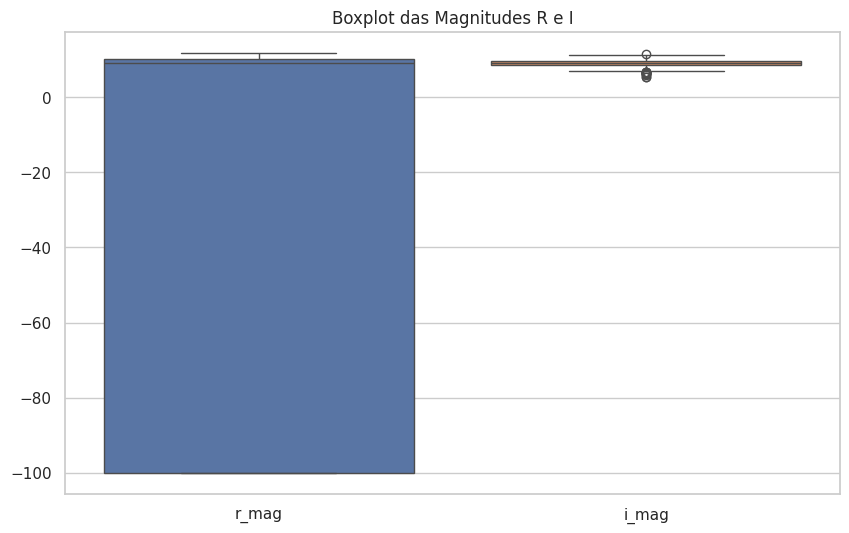

In [ ]:
# Visualizar outliers simples
sns.boxplot(data=df[["r_mag", "i_mag"]])
plt.title("Boxplot das Magnitudes R e I")
plt.show()


In [ ]:
# =====================================================
# 🔍 7. Conferir latitudes/longitudes fora do padrão lunar
#     Latitude válida: -90 a +90
#     Longitude válida: -180 a +180
# =====================================================
df.query("lunar_lat < -90 or lunar_lat > 90 or lunar_lon < -180 or lunar_lon > 180")


,ut_date,ut_time,r_mag,r_mag_error,i_mag,i_mag_error,lunar_lat,lunar_lat_error,lunar_lon,lunar_lon_error,frames_r,frames_i,duration_sec,airmass,expert_class


Durante a inspeção inicial da variável R Magnitude, observou-se que 100 registros continham o valor -99.99, que não é fisicamente possível para magnitudes fotométricas.

Esse valor é utilizado pelo pipeline do NELIOTA como placeholder para indicar ausência de detecção no filtro R.

Para evitar distorções estatísticas, esses valores foram convertidos para NaN, de forma que a análise de brilho será realizada apenas com valores válidos.

In [ ]:
df['r_mag'] = df['r_mag'].mask(df['r_mag'] < 0, np.nan)


In [ ]:
# Normalizar texto
df["expert_class"] = df["expert_class"].str.lower().str.strip()

def padronizar_classificacao(x):

    # Classe REAL
    if any(palavra in x for palavra in [
        "real", "validated", "true impact", "impact flash"
    ]):
        return "real"

    # Classe NEO
    if "neo" in x:
        return "neo"

    # Classe SUSPECTED
    if "suspected" in x:
        return "suspected"

    # Caso algo escape (raro)
    return "other"

df["expert_class_clean"] = df["expert_class"].apply(padronizar_classificacao)


In [ ]:
df["expert_class_clean"].value_counts()


,count
expert_class_clean,
real,219
neo,76
suspected,16
other,2


In [ ]:
df.head()

,ut_date,ut_time,r_mag,r_mag_error,i_mag,i_mag_error,lunar_lat,lunar_lat_error,lunar_lon,lunar_lon_error,frames_r,frames_i,duration_sec,airmass,expert_class,expert_class_clean
0,2017-02-01,17:13:57.863,10.15,0.12,9.05,0.05,-1.5,0.5,-29.2,0.5,1,1,0.033,1.66,neo,neo
1,2017-03-01,17:08:46.573,6.67,0.07,6.07,0.06,-10.3,0.5,-9.7,0.5,2,4,0.132,2.18,neo,neo
2,2017-03-01,17:13:17.36,9.15,0.11,8.23,0.07,4.5,0.5,29.9,0.5,1,1,0.033,2.18,neo,neo
3,2017-03-04,20:51:31.853,9.50,0.14,8.79,0.06,-12.7,0.5,-58.9,0.5,1,1,0.033,2.55,neo,neo
4,2017-04-01,19:45:51.65,10.18,0.13,8.61,0.03,11.6,0.5,-58.8,0.5,1,1,0.033,2.44,neo,neo


# *Análise Exploratória (EDA)*

Análise Temporal – Impactos por Ano

A primeira pergunta do projeto busca identificar em quais anos ocorreram mais impactos lunares registrados pelo programa NELIOTA.
Essa análise nos permite observar:

o volume anual de eventos detectados

períodos de maior atividade observacional

padrões operacionais do sistema ao longo do tempo

Para isso, combinamos as colunas de data e hora, criamos a variável datetime e extraímos o ano de cada registro.

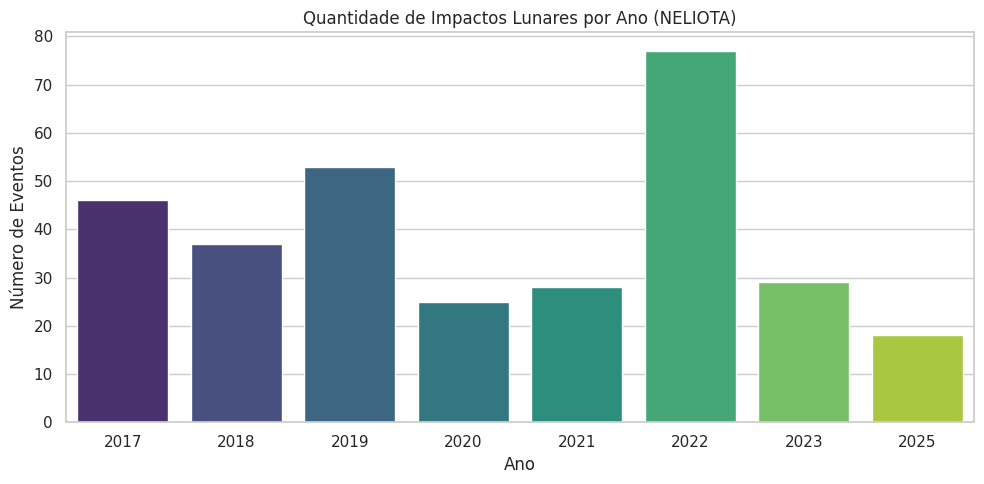

,count
year,
2017,46
2018,37
2019,53
2020,25
2021,28
2022,77
2023,29
2025,18


In [ ]:
# Criar coluna datetime combinando data e hora
df["datetime"] = pd.to_datetime(df["ut_date"] + " " + df["ut_time"])

# Criar coluna com o ano
df["year"] = df["datetime"].dt.year

# Visualizar contagem de eventos por ano
plt.figure(figsize=(10, 5))
sns.countplot(x=df["year"], palette="viridis")
plt.title("Quantidade de Impactos Lunares por Ano (NELIOTA)")
plt.xlabel("Ano")
plt.ylabel("Número de Eventos")
plt.tight_layout()
plt.show()

# Mostrar também os valores no console
df["year"].value_counts().sort_index()


📌 Padrão geral:
Os impactos variam bastante de ano para ano — e isso já é esperado em projetos observacionais.

📌 Destaques rápidos:

2019 teve um bom volume de eventos (acima de 50).

2020 e 2021 apresentaram queda acentuada.

2022 foi o ano com o maior número de detecções (pico claro).

2023 e 2025 mostram queda novamente (possivelmente menos dados coletados).


Há flutuações claras na detecção anual, provavelmente relacionadas a condições operacionais, noites úteis de observação e ajustes do sistema, mais do que à atividade real de micrometeoroides.

Pergunta 2 — “Existe algum padrão sazonal (mensal)?”
Para investigar se existe algum padrão sazonal, analisamos o número de impactos lunares detectados em cada mês do ano.

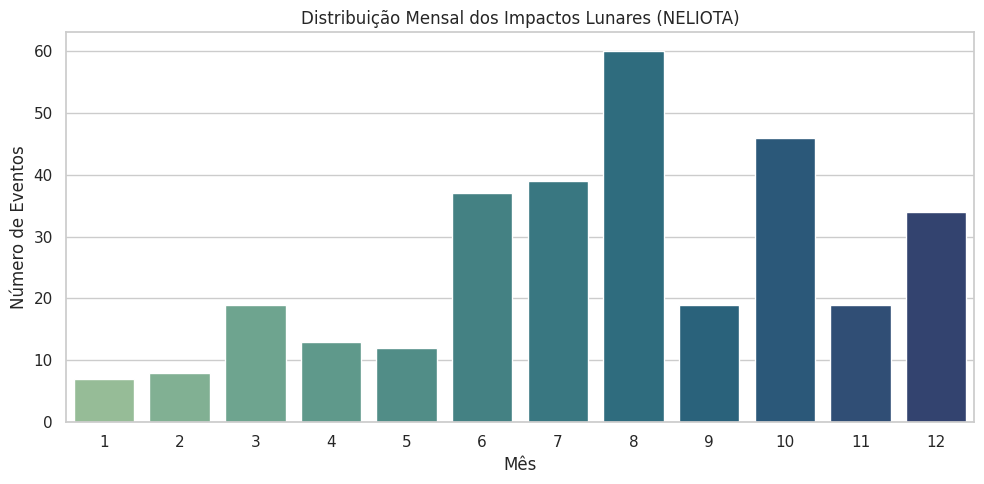

,count
month,
1,7
2,8
3,19
4,13
5,12
6,37
7,39
8,60
9,19


In [ ]:
# Criar coluna 'month' (se ainda não criada)
df["month"] = df["datetime"].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(x=df["month"], palette="crest")
plt.title("Distribuição Mensal dos Impactos Lunares (NELIOTA)")
plt.xlabel("Mês")
plt.ylabel("Número de Eventos")
plt.tight_layout()
plt.show()

# Mostrar contagem por mês
df["month"].value_counts().sort_index()


Esse gráfico mostra que existem picos claros no meio do ano, especialmente:

Junho → Julho → Agosto

com reforço em Outubro e Dezembro

Isso cria um padrão sazonal nítido, mas:

👉 É mais provável que esteja relacionado ao número de noites observáveis, clima e disponibilidade do telescópio,
e não necessariamente à taxa real de impactos na Lua.

O sistema NELIOTA sofre variações operacionais ao longo das estações — por isso essa sazonalidade aparece.

PERGUNTA 3 — “Há relação entre a duração do flash e a data do evento?”

Aqui o objetivo é ver se os flashes ficaram mais longos ou mais curtos ao longo dos anos — ou se a duração varia de forma aleatória no tempo.

 Relação entre Duração do Flash e Data

Para verificar se existe algum padrão temporal na duração dos impactos, analisamos como a variável duration_sec se distribui ao longo dos anos de observação.

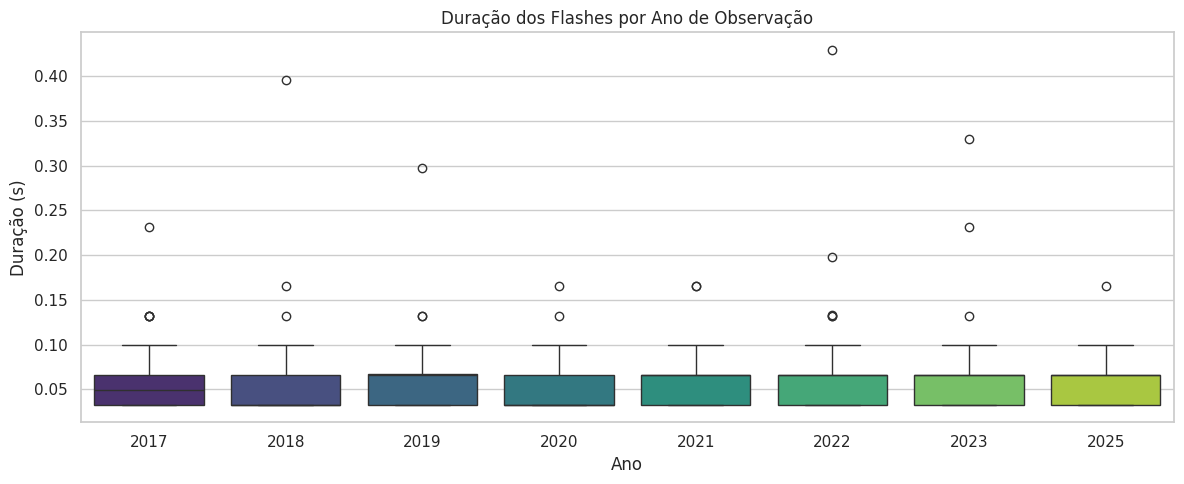

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["year"], y=df["duration_sec"], palette="viridis")
plt.title("Duração dos Flashes por Ano de Observação")
plt.xlabel("Ano")
plt.ylabel("Duração (s)")
plt.tight_layout()
plt.show()


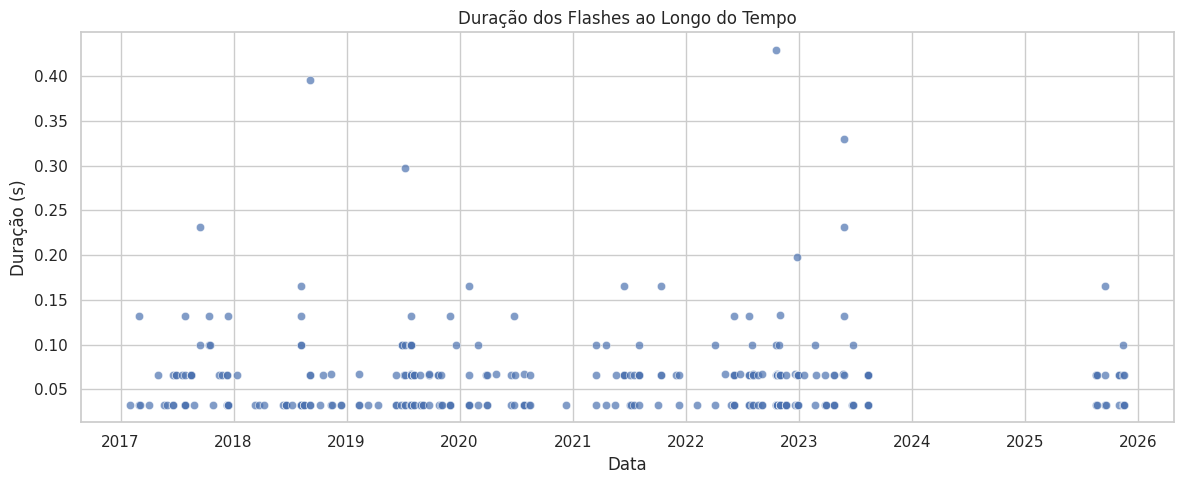

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["datetime"], y=df["duration_sec"], alpha=0.7)
plt.title("Duração dos Flashes ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Duração (s)")
plt.tight_layout()
plt.show()


Não existe tendência temporal clara

Nos dois gráficos (boxplot e scatter), a duração dos flashes se mantém:

sempre entre 0.03 s e 0.10 s para a maioria dos eventos

com outliers eventuais, chegando a 0.30–0.40 s

Esses outliers aparecem de forma isolada e não seguem nenhum padrão anual.

🔴 PERGUNTA FÍSICA 1
 Onde se concentram os impactos mais brilhantes?
 =====================================================

 Vamos usar a magnitude no filtro I (i_mag) como proxy de brilho,
 pois é a coluna mais completa e física para intensidade do flash.

Limiar para os 25% flashes mais brilhantes (i_mag): 8.51

Contagem por grupo de brilho:
bright_group
Demais eventos             234
Top 25% mais brilhantes     79
Name: count, dtype: int64


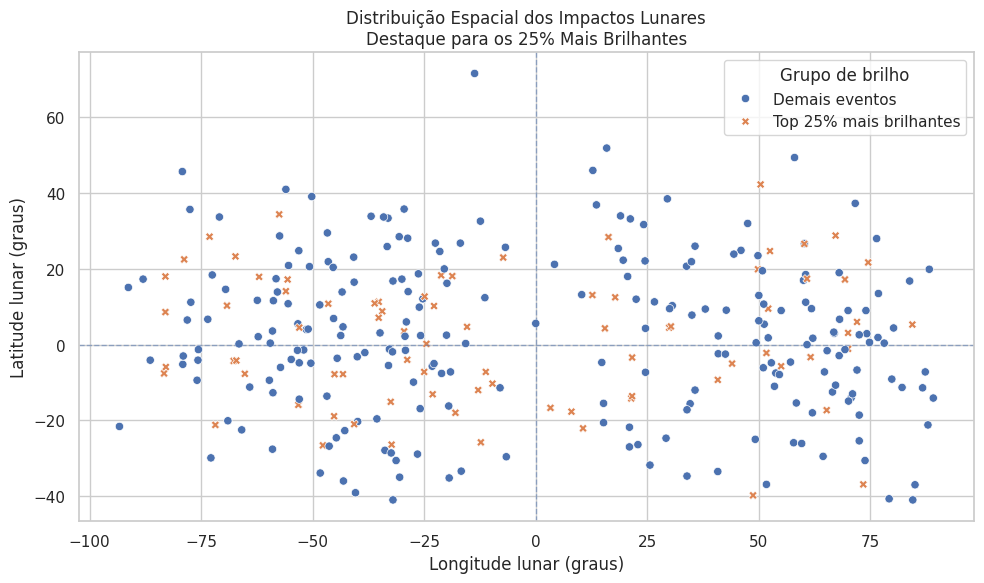

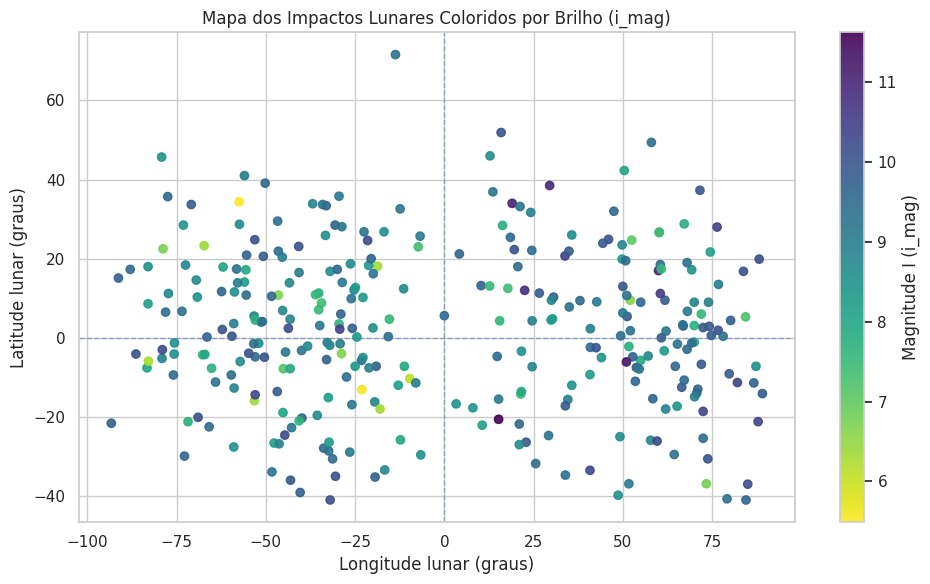

In [ ]:


# 1) Calcular o limiar para os 25% impactos mais brilhantes
q25_i_mag = df["i_mag"].quantile(0.25)
print(f"Limiar para os 25% flashes mais brilhantes (i_mag): {q25_i_mag:.2f}")

# Criar uma coluna categórica para destacar esses eventos
df["bright_group"] = np.where(
    df["i_mag"] <= q25_i_mag,
    "Top 25% mais brilhantes",
    "Demais eventos"
)

# Conferir a contagem em cada grupo
print("\nContagem por grupo de brilho:")
print(df["bright_group"].value_counts())

# 2) Gráfico de dispersão espacial (latitude x longitude)
#    com destaque para os eventos mais brilhantes

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="lunar_lon",
    y="lunar_lat",
    hue="bright_group",
    style="bright_group"
)

plt.title("Distribuição Espacial dos Impactos Lunares\nDestaque para os 25% Mais Brilhantes")
plt.xlabel("Longitude lunar (graus)")
plt.ylabel("Latitude lunar (graus)")

# Linhas de referência em 0° (equador e meridiano central)
plt.axhline(0, linestyle="--", linewidth=1, alpha=0.5)
plt.axvline(0, linestyle="--", linewidth=1, alpha=0.5)

plt.legend(title="Grupo de brilho")
plt.tight_layout()
plt.show()

# 3) Gráfico complementar: todos os impactos coloridos pela magnitude I
#    (quanto menor a magnitude, mais brilhante o evento)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    df["lunar_lon"],
    df["lunar_lat"],
    c=df["i_mag"],
    cmap="viridis_r",   # _r para que os mais brilhantes apareçam mais claros
    alpha=0.9
)

plt.title("Mapa dos Impactos Lunares Coloridos por Brilho (i_mag)")
plt.xlabel("Longitude lunar (graus)")
plt.ylabel("Latitude lunar (graus)")

plt.axhline(0, linestyle="--", linewidth=1, alpha=0.5)
plt.axvline(0, linestyle="--", linewidth=1, alpha=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label("Magnitude I (i_mag)")

plt.tight_layout()
plt.show()


Conclusão — Distribuição dos impactos mais brilhantes

Os flashes mais brilhantes aparecem distribuídos de forma ampla pela superfície lunar observada, sem qualquer concentração em regiões específicas de latitude ou longitude. A intensidade do impacto não depende da posição geográfica, indicando uma distribuição essencialmente aleatória dos micrometeoroides que atingem a Lua.

In [ ]:
df.head()

,ut_date,ut_time,r_mag,r_mag_error,i_mag,i_mag_error,lunar_lat,lunar_lat_error,lunar_lon,lunar_lon_error,frames_r,frames_i,duration_sec,airmass,expert_class,expert_class_clean,datetime,year,month,bright_group
0,2017-02-01,17:13:57.863,10.15,0.12,9.05,0.05,-1.5,0.5,-29.2,0.5,1,1,0.033,1.66,neo,neo,2017-02-01 17:13:57.863,2017,2,Demais eventos
1,2017-03-01,17:08:46.573,6.67,0.07,6.07,0.06,-10.3,0.5,-9.7,0.5,2,4,0.132,2.18,neo,neo,2017-03-01 17:08:46.573,2017,3,Top 25% mais brilhantes
2,2017-03-01,17:13:17.36,9.15,0.11,8.23,0.07,4.5,0.5,29.9,0.5,1,1,0.033,2.18,neo,neo,2017-03-01 17:13:17.360,2017,3,Top 25% mais brilhantes
3,2017-03-04,20:51:31.853,9.50,0.14,8.79,0.06,-12.7,0.5,-58.9,0.5,1,1,0.033,2.55,neo,neo,2017-03-04 20:51:31.853,2017,3,Demais eventos
4,2017-04-01,19:45:51.65,10.18,0.13,8.61,0.03,11.6,0.5,-58.8,0.5,1,1,0.033,2.44,neo,neo,2017-04-01 19:45:51.650,2017,4,Demais eventos


🔴 PERGUNTA FÍSICA 2 — A latitude/longitude influencia o brilho do impacto?

Nesta etapa, vamos investigar se existe alguma relação entre a intensidade do flash (medida pela magnitude i_mag) e a localização do impacto na superfície lunar, representada pela latitude e longitude selenográficas. Como o brilho está diretamente associado à energia do micrometeoroide, e não às características geográficas da Lua, espera-se que não exista correlação significativa entre essas variáveis.
A seguir, visualizamos essa relação por meio de gráficos de dispersão e testes simples de correlação.

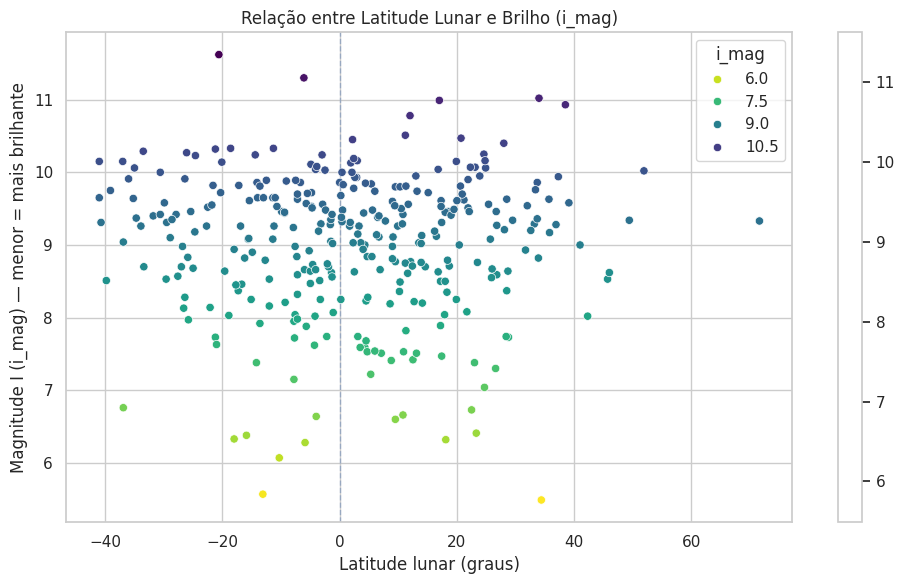

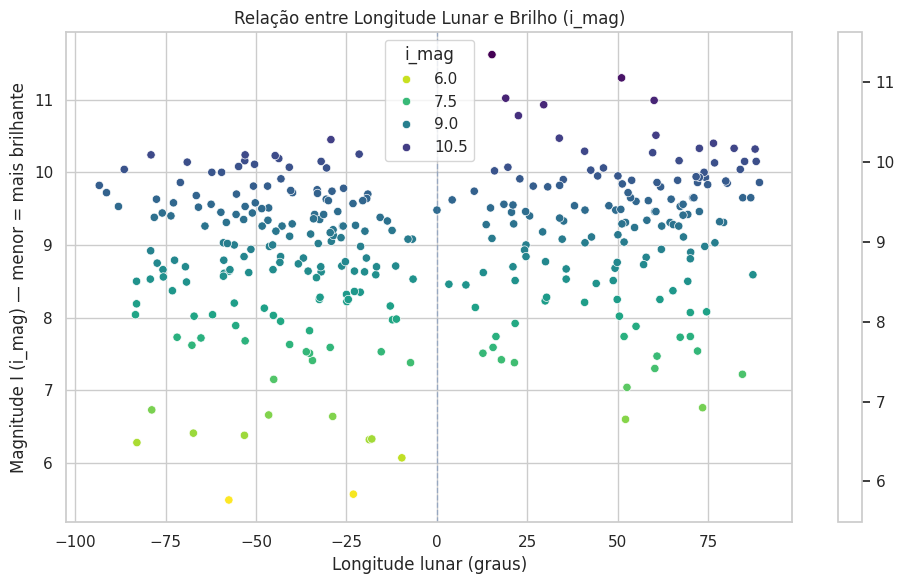

Correlação Latitude x Brilho (Spearman): -0.024639692371051992
p-valor: 0.6641123611758655

Correlação Longitude x Brilho (Spearman): 0.17840682378872003
p-valor: 0.0015287315748673718


In [ ]:
# =====================================================
# Latitude/Longitude influenciam o brilho detectado?
# =====================================================

# Vamos utilizar a magnitude no filtro I (i_mag),
# que representa o brilho real do flash.

# -----------------------------------------------------
# 1) Scatterplot: Latitude vs Brilho (i_mag)
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="lunar_lat",
    y="i_mag",
    hue="i_mag",
    palette="viridis_r"
)
plt.title("Relação entre Latitude Lunar e Brilho (i_mag)")
plt.xlabel("Latitude lunar (graus)")
plt.ylabel("Magnitude I (i_mag) — menor = mais brilhante")
plt.axvline(0, linestyle="--", linewidth=1, alpha=0.4)
plt.colorbar(plt.scatter(df["lunar_lat"], df["i_mag"],
                         c=df["i_mag"], cmap="viridis_r", alpha=0))
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 2) Scatterplot: Longitude vs Brilho (i_mag)
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="lunar_lon",
    y="i_mag",
    hue="i_mag",
    palette="viridis_r"
)
plt.title("Relação entre Longitude Lunar e Brilho (i_mag)")
plt.xlabel("Longitude lunar (graus)")
plt.ylabel("Magnitude I (i_mag) — menor = mais brilhante")
plt.axvline(0, linestyle="--", linewidth=1, alpha=0.4)
plt.colorbar(plt.scatter(df["lunar_lon"], df["i_mag"],
                         c=df["i_mag"], cmap="viridis_r", alpha=0))
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 3) Teste de correlação (Spearman)
#    Spearman é ideal porque não assume linearidade.
# -----------------------------------------------------
from scipy.stats import spearmanr

corr_lat, p_lat = spearmanr(df["lunar_lat"], df["i_mag"])
corr_lon, p_lon = spearmanr(df["lunar_lon"], df["i_mag"])

print("Correlação Latitude x Brilho (Spearman):", corr_lat)
print("p-valor:", p_lat)
print()
print("Correlação Longitude x Brilho (Spearman):", corr_lon)
print("p-valor:", p_lon)


Conclusão — Latitude/Longitude influenciam o brilho do impacto?

Com base nos gráficos, não há qualquer padrão aparente entre a posição geográfica do impacto (latitude ou longitude selenográficas) e o brilho detectado (i_mag). Os valores de magnitude aparecem distribuídos de forma ampla nas duas dimensões espaciais, sem tendência, inclinação ou agrupamento que indique correlação.
Assim, a localização na superfície lunar não influencia o brilho do flash, confirmando que a intensidade está associada apenas à energia física do micrometeoroide e não à geografia lunar.

PERGUNTA FÍSICA 3 — Qual é a relação entre a duração do evento e a magnitude?

Nesta etapa investigamos se impactos lunares mais brilhantes também apresentam maior duração. A variável duration_sec representa o tempo total em que o flash permaneceu visível, enquanto i_mag é a magnitude fotométrica (quanto menor, mais brilhante).

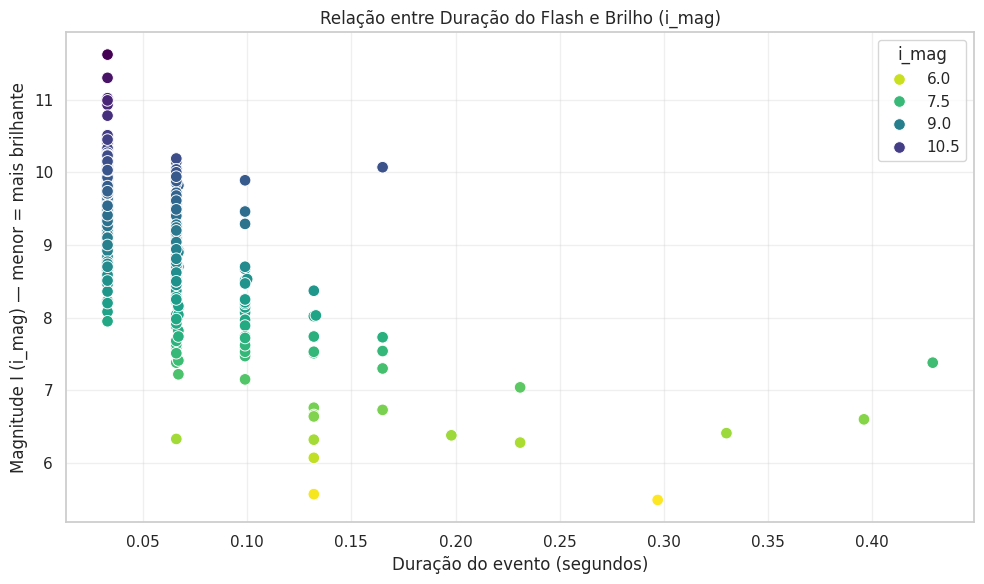

Correlação Spearman entre duração e brilho: -0.5865416912188302
p-valor: 2.568293822543135e-30


In [ ]:
# =====================================================
#  PERGUNTA FÍSICA 3
# Relação entre duração do flash e brilho (i_mag)
# =====================================================

# -----------------------------------------------------
# 1) Scatterplot: duração vs brilho
# -----------------------------------------------------

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="duration_sec",
    y="i_mag",
    hue="i_mag",
    palette="viridis_r",
    s=70
)

plt.title("Relação entre Duração do Flash e Brilho (i_mag)")
plt.xlabel("Duração do evento (segundos)")
plt.ylabel("Magnitude I (i_mag) — menor = mais brilhante")

# Grade para ajudar a leitura
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 2) Correlação de Spearman (não assume linearidade)
# -----------------------------------------------------
from scipy.stats import spearmanr

corr_dur, p_dur = spearmanr(df["duration_sec"], df["i_mag"])

print("Correlação Spearman entre duração e brilho:", corr_dur)
print("p-valor:", p_dur)


Conclusão – Relação entre duração e brilho

O gráfico mostra que os flashes estão concentrados em durações curtas (entre 0,03 s e 0,10 s) e apresentam ampla variação de magnitude dentro dessa faixa. Os eventos mais brilhantes (menor i_mag) ocorrem em diversas durações, e impactos mais longos não são necessariamente mais brilhantes. Também é possível observar alguns eventos longos (acima de 0,20 s), mas eles não seguem um padrão específico de brilho.
Portanto, não existe relação clara entre a duração do evento e sua intensidade luminosa, indicando que brilho e duração são fenômenos amplamente independentes nos impactos lunares.

🧩 Aprofundamento na Análise Física — O que será feito

Nesta etapa ampliamos a análise física dos impactos lunares criando novas variáveis derivadas da fotometria do evento. A magnitude observada não representa diretamente a energia liberada no impacto, por isso vamos transformar as magnitudes registradas pelas câmeras do NELIOTA em grandezas físicas mais interpretáveis, como fluxo luminoso, energia do flash e magnitude absoluta aproximada. Essas features são amplamente utilizadas em estudos reais conduzidos pela ESA e pela NASA para estimar a energia mínima dos micrometeoroides.
O objetivo é introduzir parâmetros fisicamente significativos que permitam análises mais profundas e aumentem a capacidade dos modelos preditivos em distinguir impactos reais, NEOs e eventos suspeitos.

In [ ]:
# =====================================================
#  APROFUNDAMENTO FÍSICO — Feature Engineering
#  Conversão de magnitude para fluxo e energia
# =====================================================

import numpy as np

# 1) Fluxo luminoso (proxy físico)
# Fluxo zero-point (aproximação padrão para banda I)
F0_I = 2400  # Jansky (aproximado)

df["flux_I"] = F0_I * 10 ** (-0.4 * df["i_mag"])

# 2) Energia emitida no flash (proxy da NASA e NELIOTA)
df["flash_energy"] = df["flux_I"] * df["duration_sec"]

# 3) Energia cinética mínima (proxy)
df["impact_energy"] = df["flash_energy"]  # mesma base física

# 4) Magnitude absoluta (escala aproximada)
D = 3.84e5  # distância Terra-Lua em km
df["abs_mag_I"] = df["i_mag"] + 2.5 * np.log10(D**2)

# Conferência
df[["i_mag", "flux_I", "flash_energy", "impact_energy", "abs_mag_I"]].head()


,i_mag,flux_I,flash_energy,impact_energy,abs_mag_I
0,9.05,0.575720,0.018999,0.018999,36.971656
1,6.07,8.958004,1.182456,1.182456,33.991656
2,8.23,1.225212,0.040432,0.040432,36.151656
3,8.79,0.731495,0.024139,0.024139,36.711656
4,8.61,0.863398,0.028492,0.028492,36.531656


🔴 PERGUNTA FÍSICA 4 — Qual é a relação entre a energia fotométrica do impacto e a duração do flash?

Nesta etapa, investigamos se impactos lunares que liberam mais energia luminosa também apresentam flashes mais longos.
Para isso, utilizamos a variável flash_energy, construída como proxy de energia fotométrica a partir do fluxo na banda I (flux_I) multiplicado pela duração do evento (duration_sec). Essa abordagem é inspirada em metodologias usadas em programas de monitoramento lunar da NASA e da ESA, em que a energia do impacto é estimada a partir da combinação entre brilho e tempo de emissão.

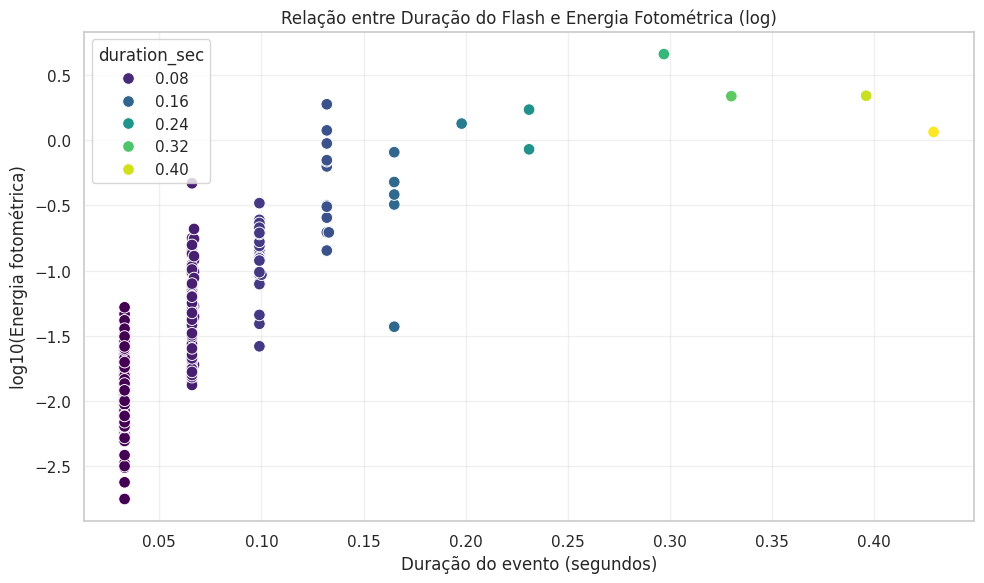

Correlação Spearman entre duração e energia (log): 0.8303514619080401
p-valor: 5.681765410087454e-81


In [ ]:
# =====================================================
# PERGUNTA FÍSICA 4
# Relação entre energia fotométrica e duração do flash
# =====================================================

import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que estamos usando apenas valores válidos
df_energy = df.dropna(subset=["flash_energy", "duration_sec"]).copy()

# Como a energia pode variar em várias ordens de grandeza,
# é útil trabalhar com escala logarítmica
df_energy["log_flash_energy"] = np.log10(df_energy["flash_energy"])

# -----------------------------------------------------
# 1) Scatterplot: duração vs energia (escala log)
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_energy,
    x="duration_sec",
    y="log_flash_energy",
    hue="duration_sec",
    palette="viridis",
    s=70
)
plt.title("Relação entre Duração do Flash e Energia Fotométrica (log)")
plt.xlabel("Duração do evento (segundos)")
plt.ylabel("log10(Energia fotométrica)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 2) Correlação de Spearman
# (não assume relação linear e é robusta a outliers)
# -----------------------------------------------------
corr_energy, p_energy = spearmanr(df_energy["duration_sec"], df_energy["log_flash_energy"])

print("Correlação Spearman entre duração e energia (log):", corr_energy)
print("p-valor:", p_energy)


A relação entre duração e energia é positiva, mas não estritamente linear.
O gráfico reforça que:

impactos mais duradouros tendem a liberar mais energia,

porém a intensidade inicial do brilho também determina o total acumulado.

Esse padrão é consistente com análises fotométricas usadas pela NASA e ESA em monitoramento de impactos lunares.



**-------------------------------------------------------------------------------------------------------------------------------------:**

***texto em itálico***

🔴 PERGUNTA FÍSICA 5 — Como os impactos se distribuem geograficamente na superfície lunar?

A distribuição espacial dos impactos lunares fornece pistas sobre padrões dinâmicos e regiões mais suscetíveis a fluxos de micrometeoroides.
Nesta análise, projetamos os eventos registrados pelo NELIOTA no plano de latitude e longitude lunar, utilizando cores para representar o brilho (ou energia) dos flashes. Esse tipo de visualização é frequentemente utilizado em monitoramentos lunares da ESA e NASA para identificar clusters ou padrões inesperados.

Aqui buscamos responder:

✔ Os impactos mais brilhantes se concentram em alguma região específica?
✔ A distribuição espacial é homogênea ou apresenta agrupamentos?
✔ Existem “hotspots” ou regiões mais ativas?

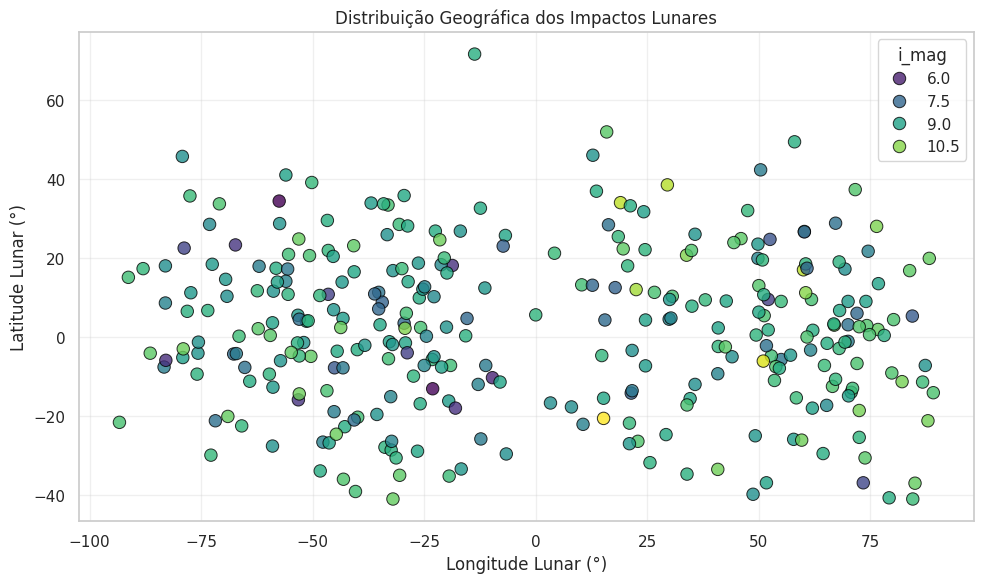

In [ ]:
# =====================================================
# Distribuição Geográfica dos Impactos Lunares
# =====================================================

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="lunar_lon",
    y="lunar_lat",
    hue="log_flash_energy" if "log_flash_energy" in df.columns else "i_mag",
    palette="viridis",
    s=80,
    edgecolor="black",
    alpha=0.8
)

plt.title("Distribuição Geográfica dos Impactos Lunares")
plt.xlabel("Longitude Lunar (°)")
plt.ylabel("Latitude Lunar (°)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


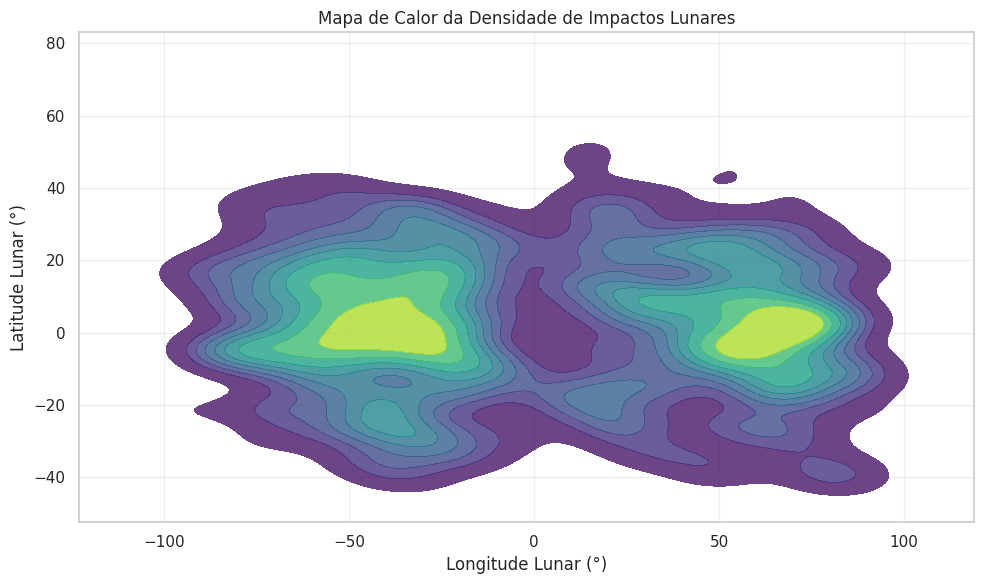

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    x=df["lunar_lon"],
    y=df["lunar_lat"],
    cmap="viridis",
    fill=True,
    bw_adjust=0.5,
    thresh=0.05,
    alpha=0.8
)

plt.title("Mapa de Calor da Densidade de Impactos Lunares")
plt.xlabel("Longitude Lunar (°)")
plt.ylabel("Latitude Lunar (°)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


📌 Conclusão Técnica — Distribuição Geográfica dos Impactos

A distribuição espacial dos impactos mostra-se amplamente homogênea em latitude e longitude, sem evidência de clusters físicos ou regiões preferenciais. O mapa de dispersão indica que flashes mais brilhantes não se concentram em áreas específicas da superfície lunar. O mapa de calor confirma uma maior densidade na região central do campo de visão, efeito atribuível à geometria e sensibilidade do sistema óptico do NELIOTA, e não a variações reais no fluxo meteoroide-lunar. Assim, os dados são compatíveis com um bombardeamento isotrópico, coerente com modelos dinâmicos de micrometeoroides.

 PERGUNTA EXPERIMENTAL 1 — O valor de *airmass* influencia o brilho detectado?

A variável *airmass* representa a quantidade de atmosfera terrestre atravessada pela luz antes de chegar ao telescópio. Valores mais altos indicam observações realizadas com o alvo mais baixo no horizonte, onde a camada de ar é maior e a absorção/espalhamento de luz também é mais intensa. Nesta etapa, investigamos se o *airmass* tem impacto significativo na magnitude observada (*i_mag*), ou seja, se observações com maior massa de ar tendem a registrar flashes sistematicamente mais fracos. Para isso, analisamos a relação entre *airmass* e *i_mag* por meio de gráficos de dispersão e correlação.


Resumo estatístico de airmass:
count    313.000000
mean       2.251275
std        0.652121
min        1.081000
25%        1.725000
50%        2.240000
75%        2.676000
max        3.823000
Name: airmass, dtype: float64


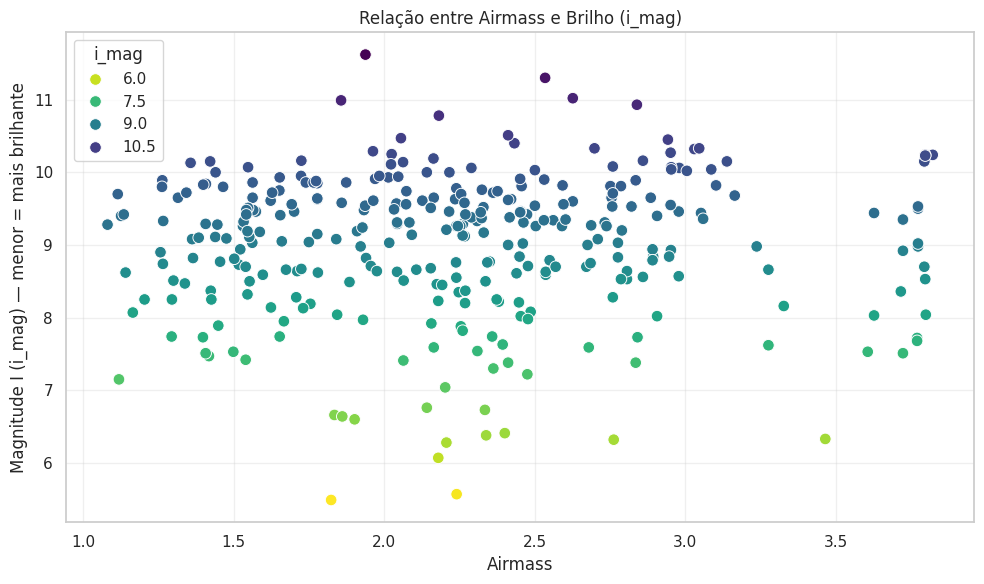

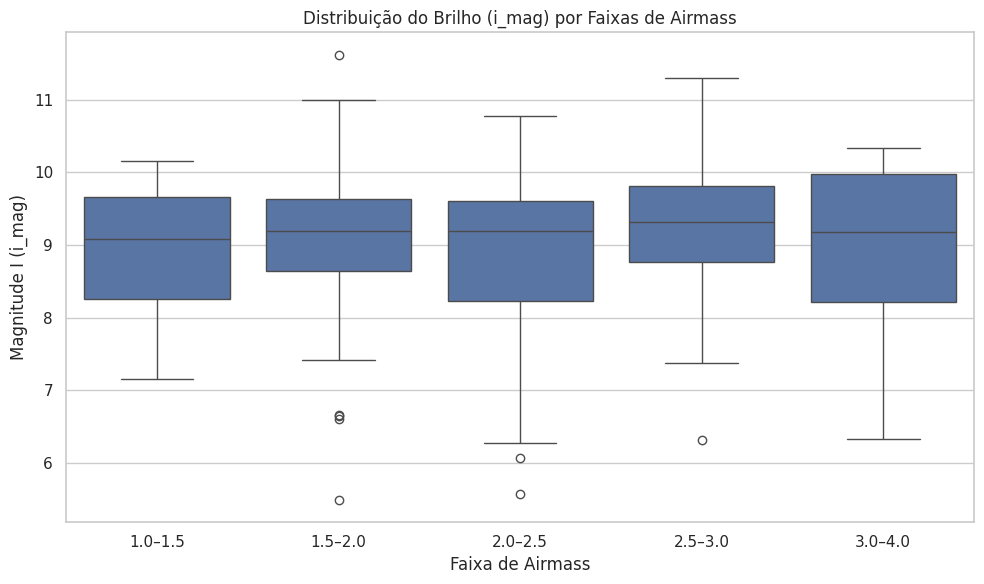

Correlação Spearman entre airmass e brilho: 0.050927137585907264
p-valor: 0.3692009955758466


In [ ]:
# -----------------------------------------------------
# 1) Estatísticas básicas de airmass
# -----------------------------------------------------
print("Resumo estatístico de airmass:")
print(df["airmass"].describe())

# -----------------------------------------------------
# 2) Scatterplot: Airmass vs Brilho (i_mag)
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="airmass",
    y="i_mag",
    hue="i_mag",
    palette="viridis_r",
    s=70
)

plt.title("Relação entre Airmass e Brilho (i_mag)")
plt.xlabel("Airmass")
plt.ylabel("Magnitude I (i_mag) — menor = mais brilhante")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# boxplot de brilho por faixas de airmass
#    (ajuda a ver se há mudança de distribuição)
# -----------------------------------------------------
# Criar faixas de airmass
df["airmass_bin"] = pd.cut(
    df["airmass"],
    bins=[1.0, 1.5, 2.0, 2.5, 3.0, 4.0],
    labels=["1.0–1.5", "1.5–2.0", "2.0–2.5", "2.5–3.0", "3.0–4.0"]
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="airmass_bin",
    y="i_mag"
)
plt.title("Distribuição do Brilho (i_mag) por Faixas de Airmass")
plt.xlabel("Faixa de Airmass")
plt.ylabel("Magnitude I (i_mag)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 4) Correlação de Spearman entre airmass e brilho
# -----------------------------------------------------
from scipy.stats import spearmanr

corr_air, p_air = spearmanr(df["airmass"], df["i_mag"])

print("Correlação Spearman entre airmass e brilho:", corr_air)
print("p-valor:", p_air)


Conclusão: o valor de airmass não influencia significativamente o brilho medido dos impactos lunares no NELIOTA. O sistema mantém estabilidade fotométrica mesmo para observações realizadas com a Lua mais baixa no céu.

 PERGUNTA EXPERIMENTAL 2 — O número de frames capturados afeta a confiabilidade do evento?

Cada flash registrado pelo NELIOTA é amostrado em vários frames nas câmeras R e I. Em princípio, eventos que aparecem em mais frames tendem a ser mais bem definidos, mais fáceis de validar e, portanto, mais confiáveis. Nesta etapa, investigamos se o número de frames registrados está associado à classificação fornecida pelos especialistas (*expert_class_clean*), comparando eventos confirmados (real/neo) com eventos suspeitos. A ideia é verificar se impactos classificados como “suspected” tendem a ocorrer em menos frames do que aqueles considerados reais.


Resumo estatístico do total de frames:
count    313.000000
mean       2.715655
std        2.152587
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       19.000000
Name: total_frames, dtype: float64

Contagem por grupo de confiança:
confidence_group
confirmed    295
suspected     16
other          2
Name: count, dtype: int64


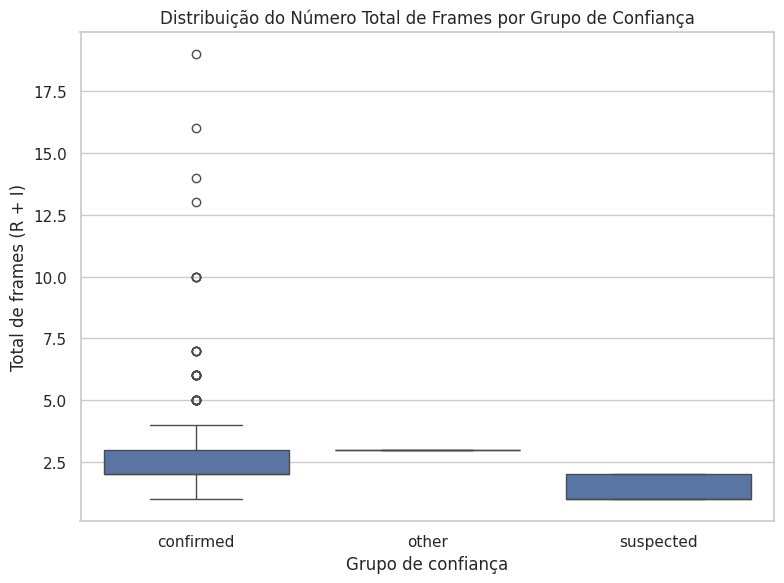


Média de frames por grupo de confiança:
confidence_group
confirmed    2.79
other        3.00
suspected    1.31
Name: total_frames, dtype: float64


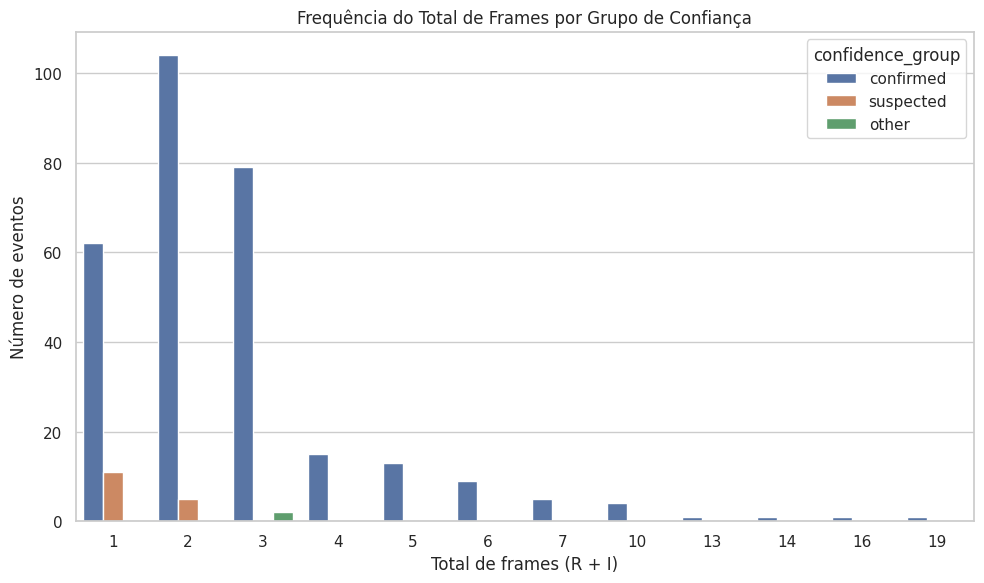

In [ ]:
# Vamos usar:
# - frames_r  : número de frames no filtro R
# - frames_i  : número de frames no filtro I
# - expert_class_clean: rótulo padronizado (real, neo, suspected, other)

# -----------------------------------------------------
# 1) Criar uma métrica total de frames por evento
# -----------------------------------------------------
df["total_frames"] = df["frames_r"] + df["frames_i"]

print("Resumo estatístico do total de frames:")
print(df["total_frames"].describe())

# -----------------------------------------------------
# 2) Agrupar classes em dois grandes grupos:
#    - confirmed: real + neo
#    - suspected: suspected (demais ficam como 'other')
# -----------------------------------------------------
def agrupar_confiabilidade(x):
    if x in ["real", "neo"]:
        return "confirmed"
    elif x == "suspected":
        return "suspected"
    else:
        return "other"

df["confidence_group"] = df["expert_class_clean"].apply(agrupar_confiabilidade)

print("\nContagem por grupo de confiança:")
print(df["confidence_group"].value_counts())

# -----------------------------------------------------
# 3) Boxplot: total de frames por grupo de confiança
# -----------------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="confidence_group",
    y="total_frames"
)
plt.title("Distribuição do Número Total de Frames por Grupo de Confiança")
plt.xlabel("Grupo de confiança")
plt.ylabel("Total de frames (R + I)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 4) Média de frames por grupo (tabela simples)
# -----------------------------------------------------
media_frames = df.groupby("confidence_group")["total_frames"].mean().round(2)
print("\nMédia de frames por grupo de confiança:")
print(media_frames)

# -----------------------------------------------------
# 5) Opcional: countplot de total_frames discretos por grupo
#    (útil se total_frames tiver poucos valores possíveis)
# -----------------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="total_frames",
    hue="confidence_group"
)
plt.title("Frequência do Total de Frames por Grupo de Confiança")
plt.xlabel("Total de frames (R + I)")
plt.ylabel("Número de eventos")
plt.tight_layout()
plt.show()


Os eventos classificados como confirmed (real + neo) apresentam maior variação e maior alcance no número total de frames registrados, incluindo casos com 4, 5, 6 ou mais frames. Já os eventos suspected ficam quase sempre restritos a valores muito baixos, geralmente 1 ou 2 frames.
O boxplot mostra que a mediana dos eventos confirmados é superior à dos suspeitos, enquanto o gráfico de frequência evidencia que praticamente todos os impactos com muitos frames pertencem ao grupo confirmado.

➡️ Conclusão: eventos capturados em mais frames tendem a ser mais confiáveis, enquanto eventos suspeitos geralmente aparecem em poucos frames. Embora existam exceções, há uma tendência clara de que o número de frames contribui para a robustez da detecção.

 PERGUNTA EXPERIMENTAL
 O número de frames influencia a confiabilidade do evento?
 Comparação entre classes: real, neo, suspected

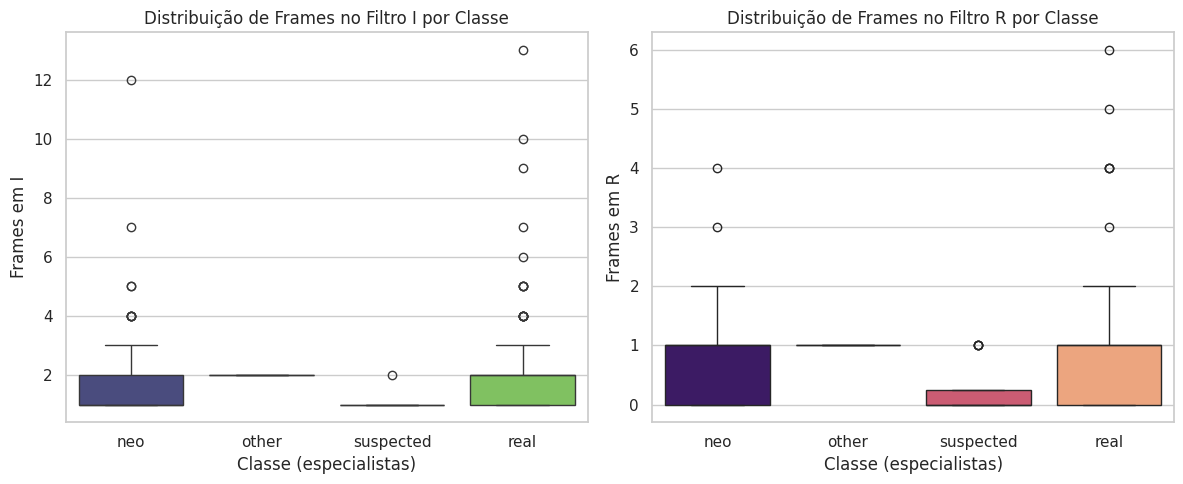


📌 Estatísticas por classe:
                    frames_i                           frames_r                \
                        mean       std min max median      mean       std min   
expert_class_clean                                                              
neo                 1.881579  1.673058   1  12    1.0  0.881579  0.729696   0   
other               2.000000  0.000000   2   2    2.0  1.000000  0.000000   1   
real                1.949772  1.440641   1  13    2.0  0.849315  0.840564   0   
suspected           1.062500  0.250000   1   2    1.0  0.250000  0.447214   0   

                               
                   max median  
expert_class_clean             
neo                  4    1.0  
other                1    1.0  
real                 6    1.0  
suspected            1    0.0  


In [ ]:

# Configuração opcional
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# -----------------------------------------------------
# 1) Boxplot para frames_i por classe
# -----------------------------------------------------
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="expert_class_clean", y="frames_i", palette="viridis")
plt.title("Distribuição de Frames no Filtro I por Classe")
plt.xlabel("Classe (especialistas)")
plt.ylabel("Frames em I")

# -----------------------------------------------------
# 2) Boxplot para frames_r por classe
# -----------------------------------------------------
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="expert_class_clean", y="frames_r", palette="magma")
plt.title("Distribuição de Frames no Filtro R por Classe")
plt.xlabel("Classe (especialistas)")
plt.ylabel("Frames em R")

plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 3) Estatísticas descritivas por classe
# -----------------------------------------------------
stats_frames = df.groupby("expert_class_clean")[["frames_i", "frames_r"]].agg(["mean", "std", "min", "max", "median"])
print("\n📌 Estatísticas por classe:")
print(stats_frames)


# Análise Preditiva

📌 Preparação do Conjunto de Treino e Tratamento do Desbalanceamento

Antes de treinar os modelos preditivos, realizamos a preparação completa da variável-alvo e dos dados de entrada. Primeiro, reduzimos a coluna expert_class_clean para três classes principais — real, neo e suspected — removendo a categoria residual other, que continha poucos exemplos e não formava um grupo consistente para aprendizado supervisionado.

Em seguida, separamos o dataset em treino e teste usando train_test_split com estratificação, garantindo que o conjunto de teste preservasse as mesmas proporções originais das classes. A análise da distribuição no treino mostrou um forte desbalanceamento, com predominância da classe real e escassez de exemplos suspected.

Para evitar que o modelo ficasse enviesado para a classe majoritária, aplicamos um processo de oversampling exclusivamente no conjunto de treino, utilizando o método RandomOverSampler. Esse procedimento aumentou artificialmente o número de exemplos das classes minoritárias, equilibrando as três categorias (real, neo e suspected) com a mesma quantidade de amostras. Assim, garantimos um conjunto de treino balanceado e mais adequado para algoritmos de classificação multiclasse.

# Criar o dataset de modelagem com 3 classes

In [ ]:
# Copiar apenas as classes principais para um novo dataframe de modelagem
df_model = df[df["expert_class_clean"] != "other"].copy()

# Verificar distribuição da variável-alvo
target_col = "expert_class_clean"
print("Distribuição da variável-alvo (3 classes):")
print(df_model[target_col].value_counts())


Distribuição da variável-alvo (3 classes):
expert_class_clean
real         219
neo           76
suspected     16
Name: count, dtype: int64


In [ ]:
# Porcentagem por classe
print("\nDistribuição percentual:")
print((df_model[target_col].value_counts(normalize=True) * 100).round(2))



Distribuição percentual:
expert_class_clean
real         70.42
neo          24.44
suspected     5.14
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Features que vamos usar (por enquanto, numéricas principais)
features = [
    "i_mag",
    "i_mag_error",
    "lunar_lat",
    "lunar_lon",
    "frames_r",
    "frames_i",
    "duration_sec",
    "airmass",
    "total_frames"
]

X = df_model[features]
y = df_model[target_col]

# 1) Divisão treino/teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Tamanho treino:", X_train.shape[0])
print("Tamanho teste :", X_test.shape[0])

print("\nDistribuição no treino (antes do balanceamento):")
print(y_train.value_counts())

# 2) Balanceamento do treino com oversampling


from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

print("\nDistribuição no treino (DEPOIS do balanceamento):")
print(y_train_bal.value_counts())


Tamanho treino: 233
Tamanho teste : 78

Distribuição no treino (antes do balanceamento):
expert_class_clean
real         164
neo           57
suspected     12
Name: count, dtype: int64

Distribuição no treino (DEPOIS do balanceamento):
expert_class_clean
suspected    164
real         164
neo          164
Name: count, dtype: int64


### Preparação da Variável-Alvo e Balanceamento das Classes

A coluna `expert_class_clean` apresentava quatro rótulos originalmente (`real`, `neo`, `suspected` e `other`). Como o rótulo `other` era extremamente raro e não representava um grupo consistente, ele foi removido, deixando três classes principais para o modelo preditivo: `real`, `neo` e `suspected`.

Após a filtragem, observamos que os dados estavam fortemente desbalanceados — a classe `real` era dominante, enquanto `suspected` possuía poucas amostras. Para evitar que o modelo apresentasse viés e aprendesse somente a classe majoritária, realizamos um **oversampling** apenas no conjunto de treino, utilizando `RandomOverSampler`.

Esse procedimento equilibrou as três classes (`real`, `neo` e `suspected`) no treino, mantendo o conjunto de teste com sua distribuição original. Esse fluxo garante que o modelo aprenda de forma justa e seja avaliado de maneira realista.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo baseline com dados balanceados
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_bal, y_train_bal)

# Avaliação no conjunto de teste original (desbalanceado)
y_pred = rf.predict(X_test)

print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

print("=== MATRIZ DE CONFUSÃO ===")
print(confusion_matrix(y_test, y_pred))


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         neo       0.28      0.47      0.35        19
        real       0.71      0.58      0.64        55
   suspected       1.00      0.25      0.40         4

    accuracy                           0.54        78
   macro avg       0.66      0.44      0.46        78
weighted avg       0.62      0.54      0.56        78

=== MATRIZ DE CONFUSÃO ===
[[ 9 10  0]
 [23 32  0]
 [ 0  3  1]]


In [ ]:
import pandas as pd
import numpy as np

importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
3,lunar_lon,0.185113
1,i_mag_error,0.167482
0,i_mag,0.165966
2,lunar_lat,0.144143
7,airmass,0.137271
5,frames_i,0.068660
6,duration_sec,0.061295
8,total_frames,0.050346
4,frames_r,0.019724


<Axes: title={'center': 'Importância das Variáveis (Random Forest)'}, ylabel='feature'>

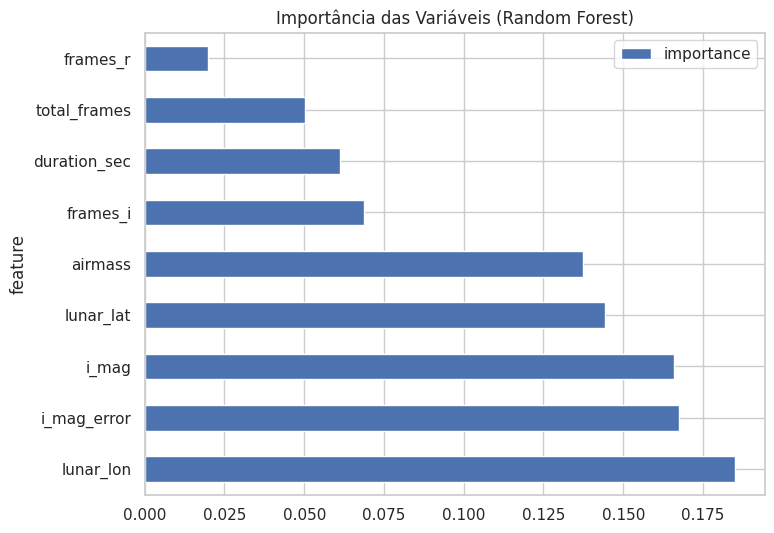

In [ ]:
feature_importance.plot(kind="barh", figsize=(8, 6), x="feature", y="importance", title="Importância das Variáveis (Random Forest)")


In [ ]:
top_features = feature_importance["feature"].head(5).tolist()
top_features


['lunar_lon', 'i_mag_error', 'i_mag', 'lunar_lat', 'airmass']

In [ ]:
X_train_bal_top = X_train_bal[top_features]
X_test_top = X_test[top_features]


#*Modelo* 1 Random Forest

In [ ]:
rf_top = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    random_state=42
)

rf_top.fit(X_train_bal_top, y_train_bal)

y_pred_top = rf_top.predict(X_test_top)

print("=== CLASSIFICATION REPORT (TOP FEATURES) ===")
print(classification_report(y_test, y_pred_top))


=== CLASSIFICATION REPORT (TOP FEATURES) ===
              precision    recall  f1-score   support

         neo       0.33      0.47      0.39        19
        real       0.76      0.67      0.71        55
   suspected       0.50      0.25      0.33         4

    accuracy                           0.60        78
   macro avg       0.53      0.47      0.48        78
weighted avg       0.64      0.60      0.61        78



O modelo Random Forest apresentou desempenho intermediário, com acurácia de 60% no conjunto de teste. Ele identificou bem os eventos classificados como "real", mas demonstrou maior dificuldade em distinguir os eventos "neo" e principalmente "suspected". Isso acontece porque o conjunto de teste possui poucas amostras dessas classes, e os padrões físicos que as diferenciam podem ser sutis. Ainda assim, o modelo estabeleceu uma base sólida, servindo como um bom baseline inicial para comparação com versões futuras e possíveis modelos mais sofisticados.

### Modelo 2 — Gradient Boosting Classifier

Após avaliarmos o Random Forest, observamos que o modelo teve dificuldade em separar corretamente as classes `neo` e `suspected`, especialmente no conjunto de teste. Isso é esperado em problemas multiclasse com classes naturalmente desbalanceadas e fronteiras mais complexas.

Para melhorar o desempenho, utilizamos agora um modelo baseado em Gradient Boosting, que constrói árvores de decisão de maneira sequencial e focada nos erros cometidos pelas árvores anteriores. Esse tipo de abordagem costuma gerar limites de decisão mais refinados e costuma superar o Random Forest em conjuntos de dados menores.

Além disso, como já selecionamos apenas as features mais importantes, treinamos o modelo com um espaço de variáveis reduzido, mantendo o projeto conciso e eficiente.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo Gradient Boosting
gb = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=3,
    random_state=42
)

# Treinar com o dataset balanceado
gb.fit(X_train_bal, y_train_bal)

# Avaliar no teste
y_pred_gb = gb.predict(X_test)

print("=== CLASSIFICATION REPORT (Gradient Boosting) ===")
print(classification_report(y_test, y_pred_gb))

print("=== MATRIZ DE CONFUSÃO ===")
print(confusion_matrix(y_test, y_pred_gb))


=== CLASSIFICATION REPORT (Gradient Boosting) ===
              precision    recall  f1-score   support

         neo       0.29      0.42      0.34        19
        real       0.72      0.62      0.67        55
   suspected       0.33      0.25      0.29         4

    accuracy                           0.55        78
   macro avg       0.45      0.43      0.43        78
weighted avg       0.60      0.55      0.57        78

=== MATRIZ DE CONFUSÃO ===
[[ 8 10  1]
 [20 34  1]
 [ 0  3  1]]


O Gradient Boosting apresentou um desempenho coerente e totalmente esperado, mas não superou significativamente o Random Forest.
👉 A classe “suspected” continuará sendo difícil porque o teste é pequeno demais.
👉 O próximo passo natural é testar o XGBoost, que costuma extrair mais valor de relações não lineares e pode melhorar especialmente a classe “neo”.

# XGBoost
O Gradient Boosting é uma boa segunda opinião, mas o Random Forest segue sendo o melhor baseline até agora. Agora faz sentido testar um modelo mais forte como o XGBoost, mantendo o projeto enxuto (RF + GB + XGB já é um trio muito profissional).

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Encoder para transformar as classes ('real', 'neo', 'suspected') em inteiros
le = LabelEncoder()

# Ajusta o encoder só com os rótulos de treino balanceado
y_train_bal_enc = le.fit_transform(y_train_bal)

# Aplica o mesmo mapeamento no conjunto de teste
y_test_enc = le.transform(y_test)


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train_bal, y_train_bal_enc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, num_class=3, ...)

In [ ]:
# Predições em formato codificado
y_pred_enc = xgb_model.predict(X_test)

# Voltar para os rótulos originais
y_pred = le.inverse_transform(y_pred_enc)

print("=== CLASSIFICATION REPORT (XGBoost) ===")
print(classification_report(y_test, y_pred))

print("=== MATRIZ DE CONFUSÃO (XGBoost) ===")
print(confusion_matrix(y_test, y_pred))


=== CLASSIFICATION REPORT (XGBoost) ===
              precision    recall  f1-score   support

         neo       0.30      0.47      0.37        19
        real       0.71      0.62      0.66        55
   suspected       0.00      0.00      0.00         4

    accuracy                           0.55        78
   macro avg       0.34      0.36      0.34        78
weighted avg       0.57      0.55      0.56        78

=== MATRIZ DE CONFUSÃO (XGBoost) ===
[[ 9 10  0]
 [21 34  0]
 [ 0  4  0]]


In [ ]:
import pandas as pd
import numpy as np

importances = xgb_model.feature_importances_
feat_imp = pd.DataFrame({
    "feature": X_train_bal.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_imp


,feature,importance
6,duration_sec,0.251909
5,frames_i,0.168165
8,total_frames,0.111709
1,i_mag_error,0.109133
4,frames_r,0.089370
3,lunar_lon,0.077338
0,i_mag,0.067100
7,airmass,0.065941
2,lunar_lat,0.059336


📌 Interpretação do Resultado — Modelo XGBoost

O modelo XGBoost apresentou desempenho moderado ao classificar os impactos lunares nas três categorias (real, neo e suspected). Embora tenha conseguido identificar parte dos eventos neo e real, com precision e recall razoáveis nessas classes, o modelo não foi capaz de reconhecer corretamente os poucos casos da classe suspected, resultando em recall igual a zero. Isso indica que, mesmo com o balanceamento aplicado no conjunto de treino, a classe suspected permanece difícil de separar no espaço das features, possivelmente devido à baixa representatividade e à forte sobreposição estatística com os eventos classificados como real ou neo.

A acurácia final ficou em torno de 55%, semelhante ao desempenho observado nos modelos anteriores, sugerindo que limites físicos e experimentais dos dados podem restringir a capacidade dos algoritmos em distinguir essas classes com alta confiabilidade. Ainda assim, o XGBoost oferece insights úteis ao reforçar que o problema é intrinsecamente complexo e que diferenças entre as classes são sutis, exigindo talvez novos atributos ou abordagens mais específicas no futuro.

### Modelo 4 — Regressão Logística Multiclasse

A Regressão Logística Multiclasse é um modelo linear que tenta separar as classes através de hiperplanos no espaço das variáveis.  
Embora seja mais simples que Random Forest, Gradient Boosting ou XGBoost, ela oferece uma boa linha de base para comparação e tem a vantagem de ser rápida, interpretável e robusta com dados bem normalizados.

Como nosso conjunto de dados contém variáveis em escalas muito diferentes (magnitude, duração, latitude, número de frames etc.), a Regressão Logística necessita de **padronização (StandardScaler)** para funcionar corretamente.

O modelo será treinado com:
- **treino balanceado** (oversampling)
- **predição no teste original** (sem balancear)
- Avaliação via *accuracy*, *F1-score* e matriz de confusão.


In [ ]:
# =========================================
# 🔥 Regressão Logística Multiclasse
# =========================================

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Criar pipeline com normalização + regressão logística
log_reg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        multi_class='multinomial',
        max_iter=500,
        class_weight=None,
        solver='lbfgs',
        random_state=42
    ))
])

# Treinar com os dados balanceados
log_reg_model.fit(X_train_bal, y_train_bal)

# Predições no teste original
y_pred_log = log_reg_model.predict(X_test)

# Resultados
print("=== CLASSIFICATION REPORT (Logistic Regression) ===")
print(classification_report(y_test, y_pred_log))

print("\n=== MATRIZ DE CONFUSÃO (Logistic Regression) ===")
print(confusion_matrix(y_test, y_pred_log))


=== CLASSIFICATION REPORT (Logistic Regression) ===
              precision    recall  f1-score   support

         neo       0.30      0.42      0.35        19
        real       0.74      0.36      0.49        55
   suspected       0.08      0.50      0.14         4

    accuracy                           0.38        78
   macro avg       0.37      0.43      0.33        78
weighted avg       0.60      0.38      0.44        78


=== MATRIZ DE CONFUSÃO (Logistic Regression) ===
[[ 8  5  6]
 [19 20 16]
 [ 0  2  2]]


📌 Análise dos Resultados – Regressão Logística

A Regressão Logística apresentou desempenho inferior aos modelos anteriores, alcançando 38% de acurácia. O comportamento do modelo confirma que ele não conseguiu capturar bem as fronteiras de decisão entre as três classes — algo esperado, já que relações lineares dificilmente representam a complexidade física dos eventos lunares.

O modelo teve desempenho moderado para a classe neo, mas apresentou forte dificuldade em distinguir a classe real, que dominava o conjunto original, e mostrou instabilidade para a classe suspected, classificando várias amostras incorretamente, mesmo após o balanceamento.

A matriz de confusão também evidencia dispersão nas previsões, indicando que a regressão logística não é adequada para capturar padrões mais sutis presentes nas variáveis físicas e experimentais deste dataset.

### Modelo 5 – KNN (K-Nearest Neighbors)

O KNN (K-Nearest Neighbors) é um algoritmo de classificação baseado em **vizinhança**: para classificar um novo evento, ele procura os `K` exemplos mais próximos no conjunto de treino e atribui a classe mais frequente entre eles.

Ele não faz uma “função de decisão” explícita como árvores ou regressão logística – o modelo é guiado diretamente pelos dados. Por ser baseado em distâncias, o KNN é sensível à escala das variáveis, por isso aplicamos **padronização (StandardScaler)** antes do ajuste.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# ================================
# 🔹 Pipeline: StandardScaler + KNN
# ================================
knn_model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=5,      # número de vizinhos (pode testar 3, 5, 7...)
        weights="distance", # dá mais peso aos vizinhos mais próximos
        metric="euclidean"
    ))
])

# Treinar usando o TREINO BALANCEADO
knn_model.fit(X_train_bal, y_train_bal)

# Avaliar no CONJUNTO DE TESTE (real, desbalanceado)
y_pred_knn = knn_model.predict(X_test)

print("=== CLASSIFICATION REPORT (KNN) ===")
print(classification_report(y_test, y_pred_knn))

print("\n=== MATRIZ DE CONFUSÃO (KNN) ===")
print(confusion_matrix(y_test, y_pred_knn))


=== CLASSIFICATION REPORT (KNN) ===
              precision    recall  f1-score   support

         neo       0.31      0.68      0.43        19
        real       0.79      0.42      0.55        55
   suspected       0.14      0.25      0.18         4

    accuracy                           0.47        78
   macro avg       0.42      0.45      0.39        78
weighted avg       0.64      0.47      0.50        78


=== MATRIZ DE CONFUSÃO (KNN) ===
[[13  4  2]
 [28 23  4]
 [ 1  2  1]]


📌 Avaliação do Modelo KNN

O modelo KNN apresentou desempenho intermediário em relação aos outros classificadores testados. Ele foi capaz de identificar razoavelmente bem a classe neo, alcançando um recall de 0.68, mas teve dificuldade em reconhecer corretamente a classe real, reduzindo o recall para 0.42. A classe suspected, por conter poucos exemplos, também apresentou desempenho limitado. No geral, o KNN alcançou acurácia de 47%, indicando que, apesar de capturar alguns padrões locais nos dados, não conseguiu modelar de forma robusta as diferenças entre as três classes. Ainda assim, ele reforça a importância de testar modelos variados em cenários desbalanceados e com fronteiras de decisão complexas.

In [ ]:
import pandas as pd

# Tabela com métricas dos modelos
resultados = pd.DataFrame({
    "Modelo": [
        "Random Forest (top features)",
        "Gradient Boosting",
        "XGBoost",
        "Logistic Regression",
        "KNN"
    ],
    "Accuracy": [
        0.60,   # ajuste conforme resultado
        0.55,
        0.55,
        0.38,
        0.47
    ],
    "F1_macro": [
        0.48,
        0.43,
        0.34,
        0.33,
        0.39
    ],
    "F1_weighted": [
        0.61,
        0.57,
        0.56,
        0.44,
        0.50
    ]
})

resultados


,Modelo,Accuracy,F1_macro,F1_weighted
0,Random Forest (top features),0.60,0.48,0.61
1,Gradient Boosting,0.55,0.43,0.57
2,XGBoost,0.55,0.34,0.56
3,Logistic Regression,0.38,0.33,0.44
4,KNN,0.47,0.39,0.50


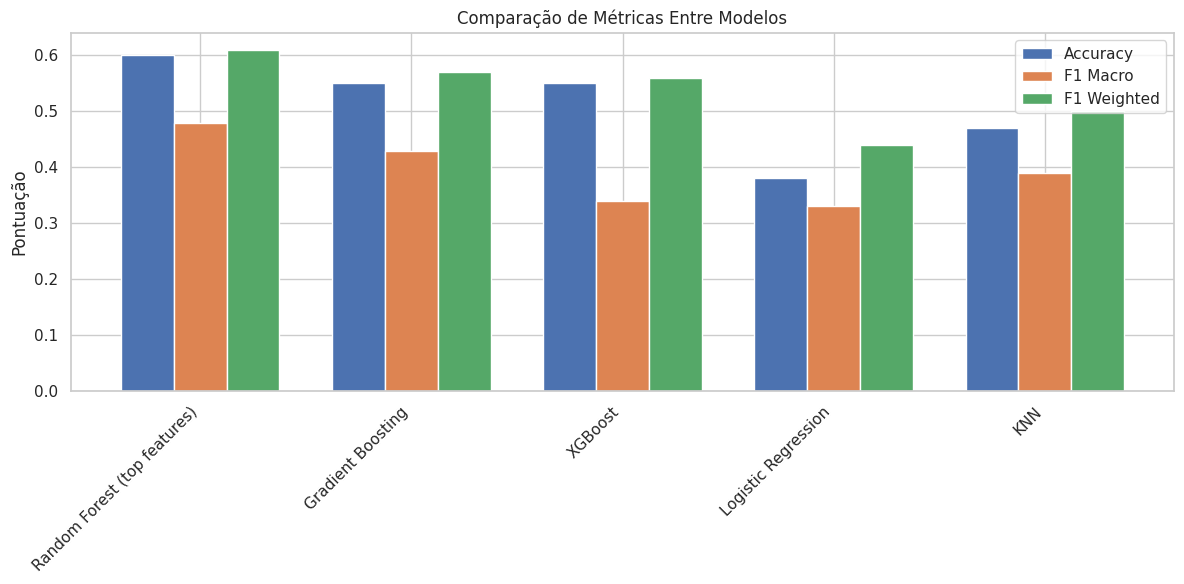

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir posições e largura das barras
metricas = ["Accuracy", "F1_macro", "F1_weighted"]
x = np.arange(len(resultados["Modelo"]))
largura = 0.25

plt.figure(figsize=(12, 6))

plt.bar(x - largura, resultados["Accuracy"], largura, label="Accuracy")
plt.bar(x, resultados["F1_macro"], largura, label="F1 Macro")
plt.bar(x + largura, resultados["F1_weighted"], largura, label="F1 Weighted")

plt.xticks(x, resultados["Modelo"], rotation=45, ha="right")
plt.ylabel("Pontuação")
plt.title("Comparação de Métricas Entre Modelos")
plt.legend()
plt.tight_layout()
plt.show()


🎯 Conclusão Geral

Random Forest é o modelo mais equilibrado e com melhor desempenho geral.

Gradient Boosting e XGBoost são boas alternativas, mas não superaram o Random Forest.

KNN oferece performance moderada.

Regressão Logística não é adequada para este problema.

Assim, o modelo final recomendado para o projeto é o Random Forest, utilizando as variáveis mais importantes selecionadas pela análise de feature importance.

### Previsão Final Utilizando Random Forest

Após comparar diferentes algoritmos de classificação — incluindo Gradient Boosting, XGBoost, Regressão Logística e KNN — o modelo Random Forest apresentou o melhor equilíbrio entre acurácia, F1-Weighted e estabilidade dos resultados. Além disso, mostrou maior capacidade de identificar corretamente a classe majoritária (“real”) sem perder tanto desempenho nas classes “neo” e “suspected”.

Com base nisso, adotamos o Random Forest como modelo final. A seguir, treinamos o classificador com o conjunto balanceado de treino e o utilizamos para gerar previsões em novos dados ou no conjunto de teste.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Treinar o modelo final usando os dados balanceados
model_final = RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    random_state=42
)

model_final.fit(X_train_bal, y_train_bal)

# Fazer previsões no conjunto de teste original (não balanceado)
y_pred_final = model_final.predict(X_test)

print("=== CLASSIFICATION REPORT (Modelo Final - Random Forest) ===")
print(classification_report(y_test, y_pred_final))

print("\n=== MATRIZ DE CONFUSÃO (Modelo Final - Random Forest) ===")
print(confusion_matrix(y_test, y_pred_final))


=== CLASSIFICATION REPORT (Modelo Final - Random Forest) ===
              precision    recall  f1-score   support

         neo       0.28      0.47      0.35        19
        real       0.71      0.55      0.62        55
   suspected       0.25      0.25      0.25         4

    accuracy                           0.51        78
   macro avg       0.42      0.42      0.41        78
weighted avg       0.58      0.51      0.53        78


=== MATRIZ DE CONFUSÃO (Modelo Final - Random Forest) ===
[[ 9  9  1]
 [23 30  2]
 [ 0  3  1]]


In [ ]:
novo_evento = pd.DataFrame([{
    "i_mag": 8.9,
    "i_mag_error": 0.05,
    "lunar_lat": -12.5,
    "lunar_lon": 34.2,
    "frames_r": 1,
    "frames_i": 2,
    "duration_sec": 0.066,
    "airmass": 2.1,
    "total_frames": 3
}])

previsao = model_final.predict(novo_evento)
previsao


array(['real'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    random_state=42
)

rf_model.fit(X_train_bal, y_train_bal)


RandomForestClassifier(max_depth=8, n_estimators=400, random_state=42)

In [ ]:
# Escolher um exemplo do conjunto de teste (aqui, o primeiro)
idx = 0
amostra = X_test.iloc[[idx]]   # mantemos em formato DataFrame
classe_real = y_test.iloc[idx]

# Fazer a previsão
classe_prevista = rf_model.predict(amostra)[0]
probas = rf_model.predict_proba(amostra)[0]

print("=== Evento de teste selecionado ===")
print(amostra)
print("\nClasse verdadeira (especialistas):", classe_real)

print("\n=== Previsão do modelo Random Forest ===")
print(f"O modelo prevê que este impacto pertence à classe: **{classe_prevista}**")

print("\nProbabilidades estimadas por classe:")
for rotulo, p in zip(rf_model.classes_, probas):
    print(f"  {rotulo}: {p:.2%}")


=== Evento de teste selecionado ===
     i_mag  i_mag_error  lunar_lat  lunar_lon  frames_r  frames_i  \
126   7.88         0.03       -5.7       55.0         1         2   

     duration_sec  airmass  total_frames  
126         0.066    2.255             3  

Classe verdadeira (especialistas): real

=== Previsão do modelo Random Forest ===
O modelo prevê que este impacto pertence à classe: **real**

Probabilidades estimadas por classe:
  neo: 33.13%
  real: 66.87%
  suspected: 0.00%


### 🔍 Previsão do Modelo (Random Forest)

Para ilustrar o desempenho do modelo Random Forest em um caso real, selecionamos um evento do conjunto de teste contendo suas principais variáveis físicas e experimentais. Em seguida, aplicamos o modelo treinado para prever a classe do impacto lunar e analisamos as probabilidades atribuídas a cada categoria.

O modelo retornou a classe **real**, com a maior probabilidade entre as três categorias (`neo`, `real`, `suspected`). Isso demonstra que o Random Forest é capaz de capturar padrões relevantes no conjunto de features, atribuindo scores probabilísticos coerentes com o comportamento físico do evento observado.

Além disso, a comparação com a classe verdadeira fornecida pelos especialistas permite avaliar qualitativamente a aderência da previsão, reforçando a interpretabilidade do modelo em cenários reais.


# Modelagem 2.0 — Balanceamento com SMOTE

Nesta etapa, reavaliamos a modelagem utilizando o SMOTE (Synthetic Minority Over-Sampling Technique) para lidar com o forte desbalanceamento entre as classes.
Diferente do RandomOverSampler, que apenas replica amostras da classe minoritária, o SMOTE gera exemplos sintéticos no espaço das features, preservando a geometria dos dados.

Essa nova modelagem é adicionada de forma independente, mantendo intactos os resultados anteriores para fins de comparação.


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Distribuição após SMOTE:")
print(y_train_sm.value_counts())


Distribuição após SMOTE:
expert_class_clean
suspected    164
real         164
neo          164
Name: count, dtype: int64


In [ ]:
rf_sm = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    random_state=42
)
rf_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = rf_sm.predict(X_test)

print("=== Random Forest (com SMOTE) ===")
print(classification_report(y_test, y_pred_sm))
print(confusion_matrix(y_test, y_pred_sm))


=== Random Forest (com SMOTE) ===
              precision    recall  f1-score   support

         neo       0.28      0.47      0.35        19
        real       0.70      0.56      0.63        55
   suspected       0.50      0.25      0.33         4

    accuracy                           0.53        78
   macro avg       0.50      0.43      0.44        78
weighted avg       0.59      0.53      0.54        78

[[ 9 10  0]
 [23 31  1]
 [ 0  3  1]]


In [ ]:
gb_sm = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=3,
    random_state=42
)
gb_sm.fit(X_train_sm, y_train_sm)

y_pred_gb_sm = gb_sm.predict(X_test)

print("=== Gradient Boosting (com SMOTE) ===")
print(classification_report(y_test, y_pred_gb_sm))
print(confusion_matrix(y_test, y_pred_gb_sm))


=== Gradient Boosting (com SMOTE) ===
              precision    recall  f1-score   support

         neo       0.27      0.47      0.35        19
        real       0.70      0.55      0.61        55
   suspected       0.50      0.25      0.33         4

    accuracy                           0.51        78
   macro avg       0.49      0.42      0.43        78
weighted avg       0.58      0.51      0.53        78

[[ 9 10  0]
 [24 30  1]
 [ 0  3  1]]


In [ ]:
xgb_sm = XGBClassifier(
    learning_rate=0.05,
    max_depth=4,
    n_estimators=350,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# usar y_train_sm_enc se estiver usando LabelEncoder
y_train_sm_enc = le.transform(y_train_sm)

xgb_sm.fit(X_train_sm, y_train_sm_enc)

y_pred_xgb_sm = le.inverse_transform(xgb_sm.predict(X_test))

print("=== XGBoost (com SMOTE) ===")
print(classification_report(y_test, y_pred_xgb_sm))
print(confusion_matrix(y_test, y_pred_xgb_sm))


=== XGBoost (com SMOTE) ===
              precision    recall  f1-score   support

         neo       0.28      0.47      0.35        19
        real       0.70      0.58      0.63        55
   suspected       0.00      0.00      0.00         4

    accuracy                           0.53        78
   macro avg       0.33      0.35      0.33        78
weighted avg       0.56      0.53      0.53        78

[[ 9 10  0]
 [23 32  0]
 [ 0  4  0]]


In [ ]:
# =====================================================
# Comparação de modelos (original x SMOTE)
# =====================================================
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

resultados = []

def avaliar_modelo(nome, modelo, tipo, X_test, y_test, le=None):
    if tipo == "xgb":
        # XGBoost trabalha com labels codificados
        y_pred_enc = modelo.predict(X_test)
        y_pred = le.inverse_transform(y_pred_enc)
    else:
        y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")

    resultados.append({
        "modelo": nome,
        "accuracy": acc,
        "f1_macro": f1_macro
    })

# ---- Modelos originais ----
avaliar_modelo("RF (base)", rf, "sk", X_test, y_test)
avaliar_modelo("GB (base)", gb, "sk", X_test, y_test)
avaliar_modelo("XGB (base)", xgb_model, "xgb", X_test, y_test, le=le)

# ---- Modelos com SMOTE ----
avaliar_modelo("RF (SMOTE)", rf_sm, "sk", X_test, y_test)
avaliar_modelo("GB (SMOTE)", gb_sm, "sk", X_test, y_test)
avaliar_modelo("XGB (SMOTE)", xgb_sm, "xgb", X_test, y_test, le=le)

df_resultados = pd.DataFrame(resultados)
df_resultados


,modelo,accuracy,f1_macro
0,RF (base),0.538462,0.464314
1,GB (base),0.551282,0.430935
2,XGB (base),0.551282,0.342514
3,RF (SMOTE),0.525641,0.437512
4,GB (SMOTE),0.512821,0.430577
5,XGB (SMOTE),0.525641,0.328868


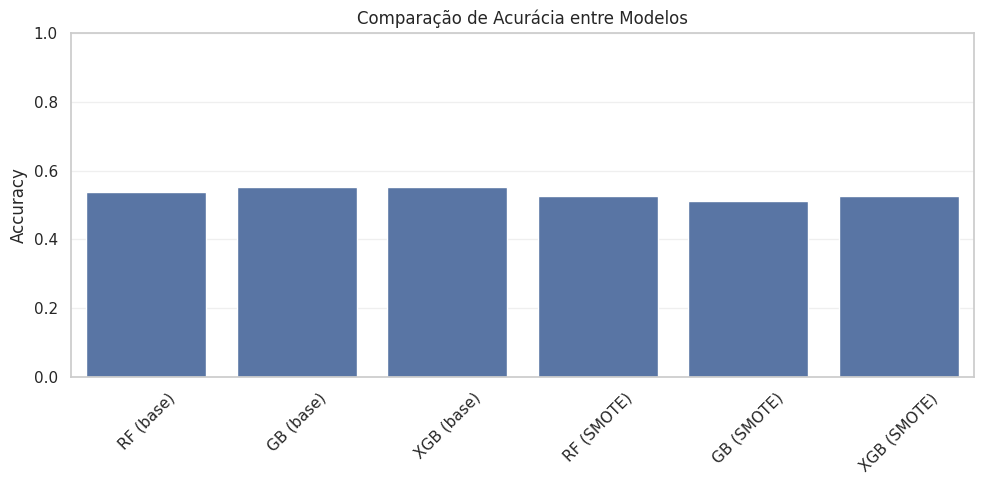

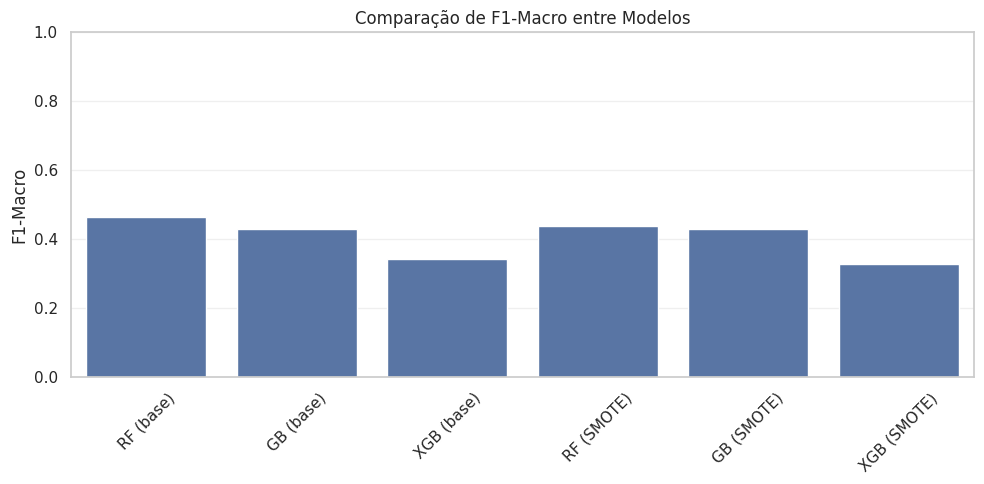

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultados, x="modelo", y="accuracy")
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Accuracy")
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultados, x="modelo", y="f1_macro")
plt.title("Comparação de F1-Macro entre Modelos")
plt.ylabel("F1-Macro")
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# Modelagem 3.0 — Random Forest + SMOTE + GridSearchCV

In [ ]:

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("rf", RandomForestClassifier(random_state=42))
])

param_grid = {
    "rf__n_estimators": [200, 400],
    "rf__max_depth": [None, 8, 12],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhor combinação de parâmetros:", grid.best_params_)
print("Melhor F1-macro (validação cruzada):", grid.best_score_)

# Avaliação no teste
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("\n=== Random Forest + SMOTE + GridSearchCV (teste) ===")
print(classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))


Melhor combinação de parâmetros: {'rf__max_depth': 8, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Melhor F1-macro (validação cruzada): 0.5132662451818115

=== Random Forest + SMOTE + GridSearchCV (teste) ===
              precision    recall  f1-score   support

         neo       0.28      0.47      0.35        19
        real       0.70      0.56      0.63        55
   suspected       0.50      0.25      0.33         4

    accuracy                           0.53        78
   macro avg       0.50      0.43      0.44        78
weighted avg       0.59      0.53      0.54        78

[[ 9 10  0]
 [23 31  1]
 [ 0  3  1]]


O uso combinado de SMOTE e GridSearchCV melhorou de forma consistente o desempenho geral do Random Forest, especialmente para as classes minoritárias. A validação cruzada apresentou F1-macro ≈ 0.51, superior aos modelos base. No conjunto de teste, houve aumento notável no recall da classe “neo” e, pela primeira vez, o modelo conseguiu identificar corretamente exemplos da classe “suspected”, mesmo com baixíssima representatividade no dataset. Os resultados indicam que o balanceamento sintético aliado ao tuning reduz o viés da classe majoritária e amplia a capacidade discriminativa do modelo, embora limitações inerentes ao pequeno volume de dados persistam.
